In [151]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 📊 Quantitative Analysis Dashboard

## 정량 분석 결과 종합 분석 및 시각화

이 노트북은 `quant_analysis_results_20250716_173649.json` 파일의 정량 분석 결과를 다각적으로 분석하고 시각화합니다.

### 분석 내용:
- 🔗 **상관관계 분석**: 특성과 수익률 간의 상관관계
- 📈 **선형회귀 분석**: 계수, p-value, VIF, 성능 지표
- 🌲 **랜덤포레스트 분석**: 특성 중요도, 성능 지표
- 🔮 **베이지안 분석**: Bayesian Ridge, ARD, 분포 분석
- 🎯 **Lasso 회귀**: 정규화, 특성 선택
- 📊 **모델 비교**: 모든 모델의 성능 비교
- 📋 **요약 리포트**: 종합적인 분석 결과

In [152]:
# 필요한 라이브러리 import
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# 프로젝트 경로 추가
sys.path.append('src')

# 시각화 클래스 import
from behavior.ml_visualizer import MLVisualizer

# 경고 무시
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ 라이브러리 import 완료")

✅ 라이브러리 import 완료


In [153]:
# 분석 결과 파일 로드
file_path = "log/quant_analysis_results_20250716_173649.json"

print(f"📁 파일 경로: {file_path}")
print(f"📁 파일 존재 여부: {Path(file_path).exists()}")

with open(file_path, "r", encoding='utf-8') as f:
    analysis_results = json.load(f)

print(f"✅ 데이터 로드 완료")
print(f"📊 분석된 심볼 수: {len(analysis_results)}")
print(f"📋 심볼 목록: {list(analysis_results.keys())}")

# 시각화 클래스 초기화
visualizer = MLVisualizer(analysis_results)
print(f"🎨 시각화 클래스 초기화 완료")

📁 파일 경로: log/quant_analysis_results_20250716_173649.json
📁 파일 존재 여부: True
✅ 데이터 로드 완료
📊 분석된 심볼 수: 3
📋 심볼 목록: ['TSLL', 'NVDL', 'PLTR']
🎨 시각화 클래스 초기화 완료


## 📋 데이터 개요

먼저 분석 결과의 전체적인 구조를 파악해보겠습니다.

In [154]:
# 데이터 구조 분석
print("🔍 데이터 구조 분석")

def format_numeric_value(value, default='N/A', precision=4):
    """숫자 값을 안전하게 포맷팅하는 함수"""
    if value is None or value == 'N/A':
        return default
    
    # 문자열 타입 지시자 처리
    if isinstance(value, str) and value.lower() in ['int', 'float', 'na', 'none', '']:
        return default
    
    try:
        return f"{float(value):.{precision}f}"
    except (ValueError, TypeError):
        return default

print("=" * 50)

for symbol in analysis_results.keys():
    print(f"\n📊 {symbol} 분석 내용:")
    symbol_data = analysis_results[symbol]
    
    for analysis_type in symbol_data.keys():
        print(f"  • {analysis_type}")
        
        # 각 분석 타입의 세부 내용
        if analysis_type == "correlation":
            corr_data = symbol_data[analysis_type]
            print(f"    - 상위 특성: {corr_data.get('top_features', [])[:5]}")
            print(f"    - 상관관계 수: {len(corr_data.get('correlations', {}))}")
            
        elif analysis_type == "linear_regression":
            lr_data = symbol_data[analysis_type]
            print(f"    - R² 점수: {format_numeric_value(lr_data.get('r_squared'))}")
            print(f"    - 특성 수: {len(lr_data.get('coefficients', {})) - 1}")
            
        elif analysis_type == "random_forest":
            rf_data = symbol_data[analysis_type]
            print(f"    - R² 점수: {format_numeric_value(rf_data.get('r_squared'))}")
            print(f"    - 특성 수: {len(rf_data.get('feature_importance', {}))}")
            
        elif analysis_type == "bayesian_regression":
            bayes_data = symbol_data[analysis_type]
            print(f"    - Bayesian Ridge R²: {format_numeric_value(bayes_data['bayesian_ridge'].get('r_squared'))}")
            print(f"    - ARD R²: {format_numeric_value(bayes_data['ard_regression'].get('r_squared'))}")
            
        elif analysis_type == "lasso_regression":
            lasso_data = symbol_data[analysis_type]
            print(f"    - R² 점수: {format_numeric_value(lasso_data.get('r_squared'))}")
            print(f"    - 최적 Alpha: {format_numeric_value(lasso_data.get('best_alpha'), precision=6)}")
            
        elif analysis_type == "bayesian_distribution":
            dist_data = symbol_data[analysis_type]
            print(f"    - VaR (95%): {format_numeric_value(dist_data.get('var_95'))}")
            print(f"    - CVaR (95%): {format_numeric_value(dist_data.get('cvar_95'))}")
            print(f"    - 변동성 평균: {format_numeric_value(dist_data.get('volatility_mean'))}")

🔍 데이터 구조 분석

📊 TSLL 분석 내용:
  • correlation
    - 상위 특성: ['cci', 'stoch_k', 'williams_r', 'rsi', 'minus_di']
    - 상관관계 수: 5
  • linear_regression
    - R² 점수: N/A
    - 특성 수: 5
  • lasso_regression
    - R² 점수: N/A
    - 최적 Alpha: 0.010985
  • random_forest
    - R² 점수: N/A
    - 특성 수: 30
  • mlp
  • bayesian_distribution
    - VaR (95%): -1.0739
    - CVaR (95%): N/A
    - 변동성 평균: N/A
  • bayesian_regression
    - Bayesian Ridge R²: N/A
    - ARD R²: N/A
  • volatility

📊 NVDL 분석 내용:
  • correlation
    - 상위 특성: ['cci', 'stoch_k', 'williams_r', 'rsi', 'plus_di']
    - 상관관계 수: 5
  • linear_regression
    - R² 점수: N/A
    - 특성 수: 5
  • lasso_regression
    - R² 점수: N/A
    - 최적 Alpha: 0.005429
  • random_forest
    - R² 점수: N/A
    - 특성 수: 29
  • mlp
  • bayesian_distribution
    - VaR (95%): -0.5280
    - CVaR (95%): N/A
    - 변동성 평균: N/A
  • bayesian_regression
    - Bayesian Ridge R²: N/A
    - ARD R²: N/A
  • volatility

📊 PLTR 분석 내용:
  • correlation
    - 상위 특성: ['stoch_k', 'willia

## 🔗 상관관계 분석

각 심볼별로 특성과 수익률 간의 상관관계를 분석해보겠습니다.

🔗 상관관계 히트맵 생성


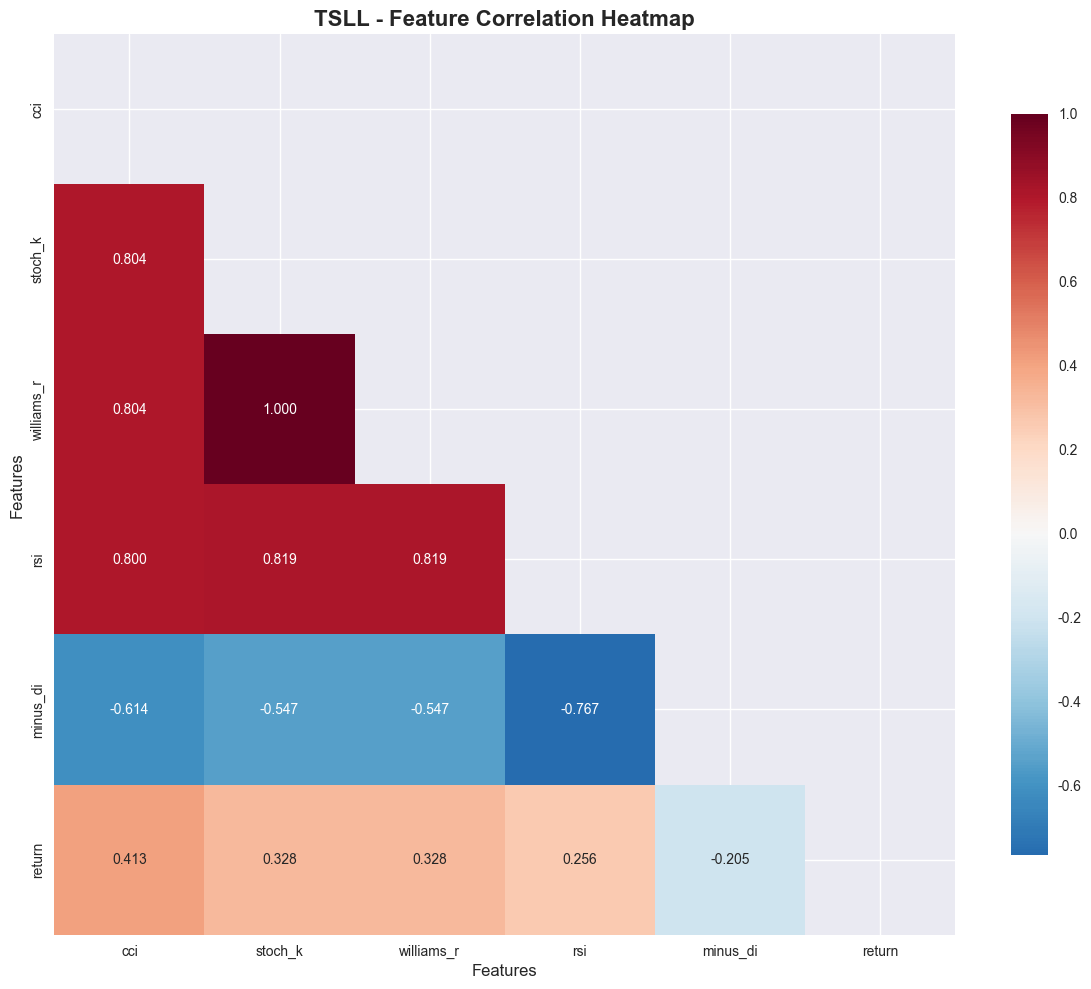

✅ TSLL 상관관계 히트맵 완료


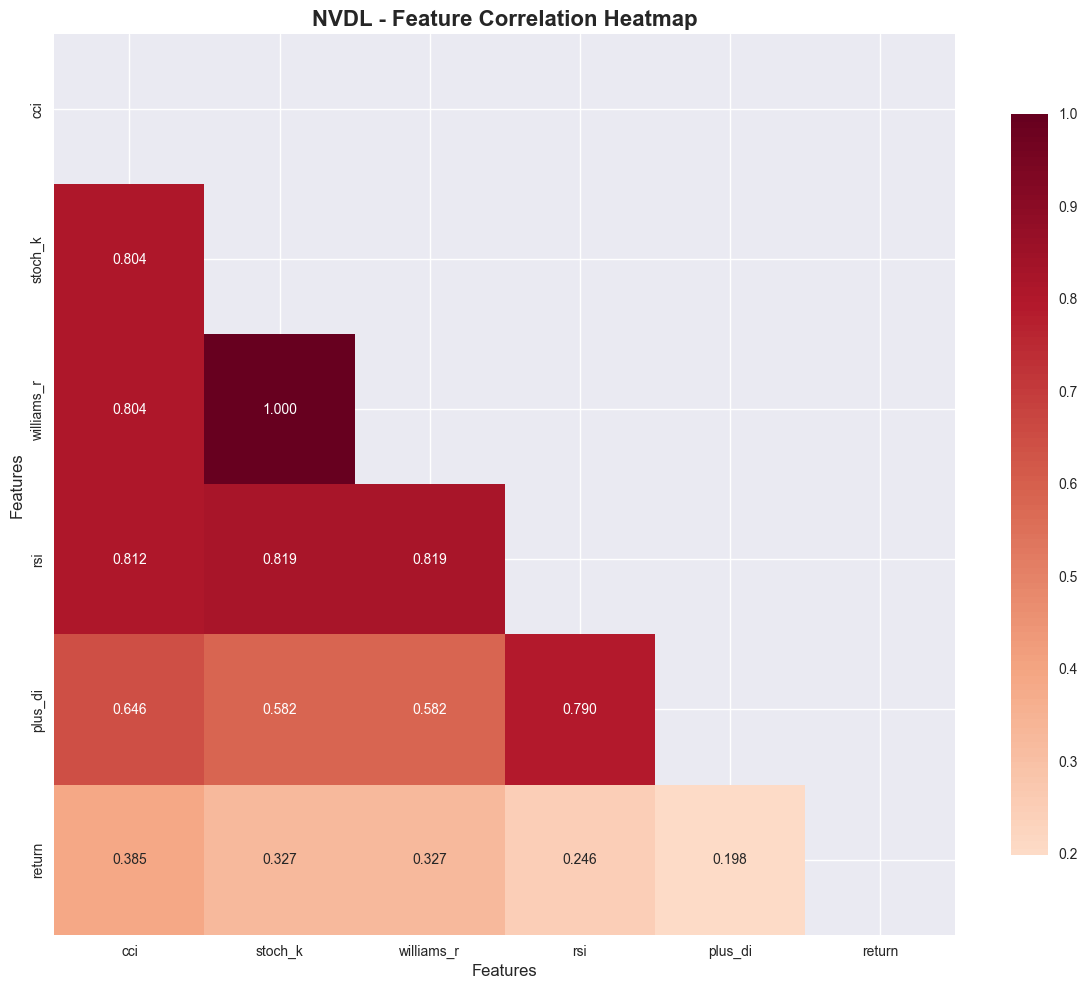

✅ NVDL 상관관계 히트맵 완료


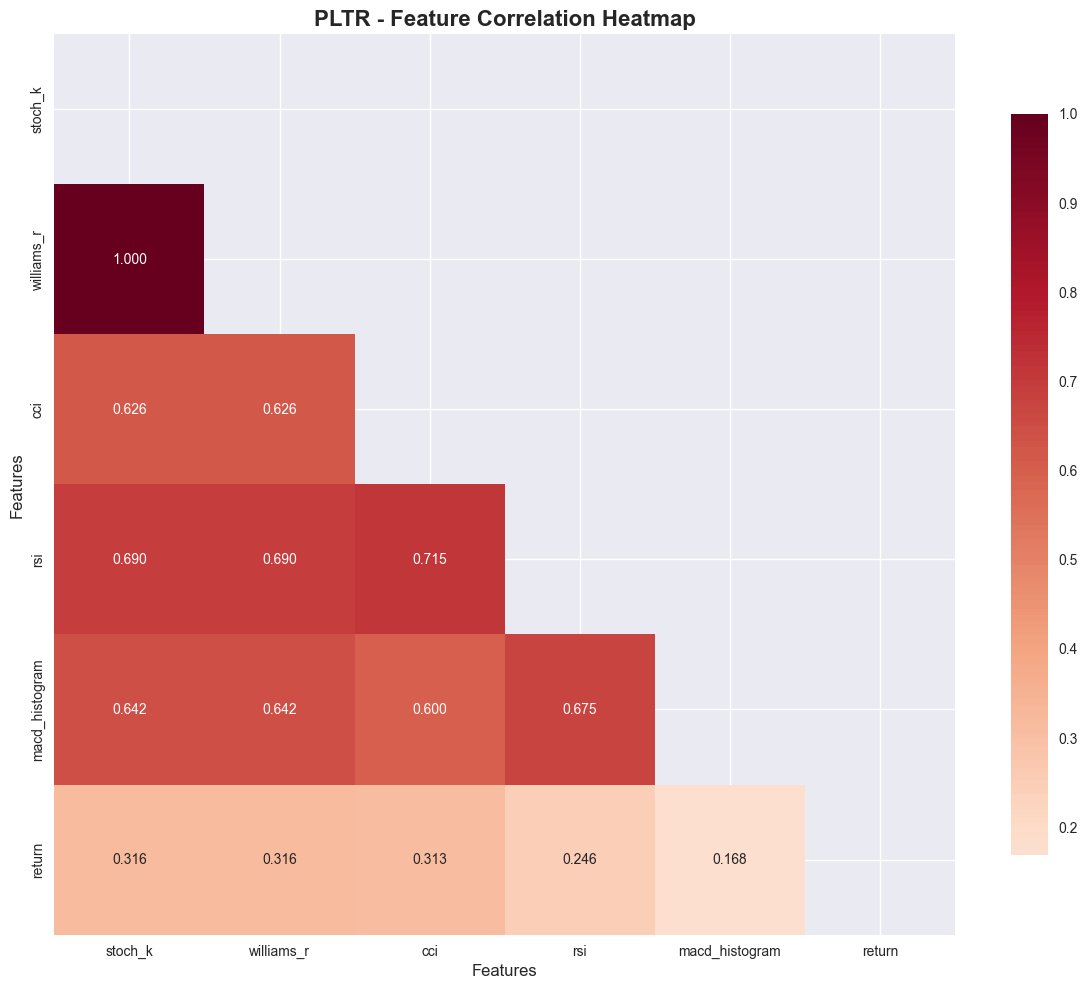

✅ PLTR 상관관계 히트맵 완료


In [155]:
# 상관관계 히트맵 시각화
print("🔗 상관관계 히트맵 생성")
print("=" * 40)

for symbol in analysis_results.keys():
    try:
        fig = visualizer.plot_correlation_heatmap(symbol, figsize=(12, 10))
        plt.show()
        print(f"✅ {symbol} 상관관계 히트맵 완료")
    except Exception as e:
        print(f"❌ {symbol} 상관관계 히트맵 오류: {e}")

📊 상관관계 막대 그래프 생성


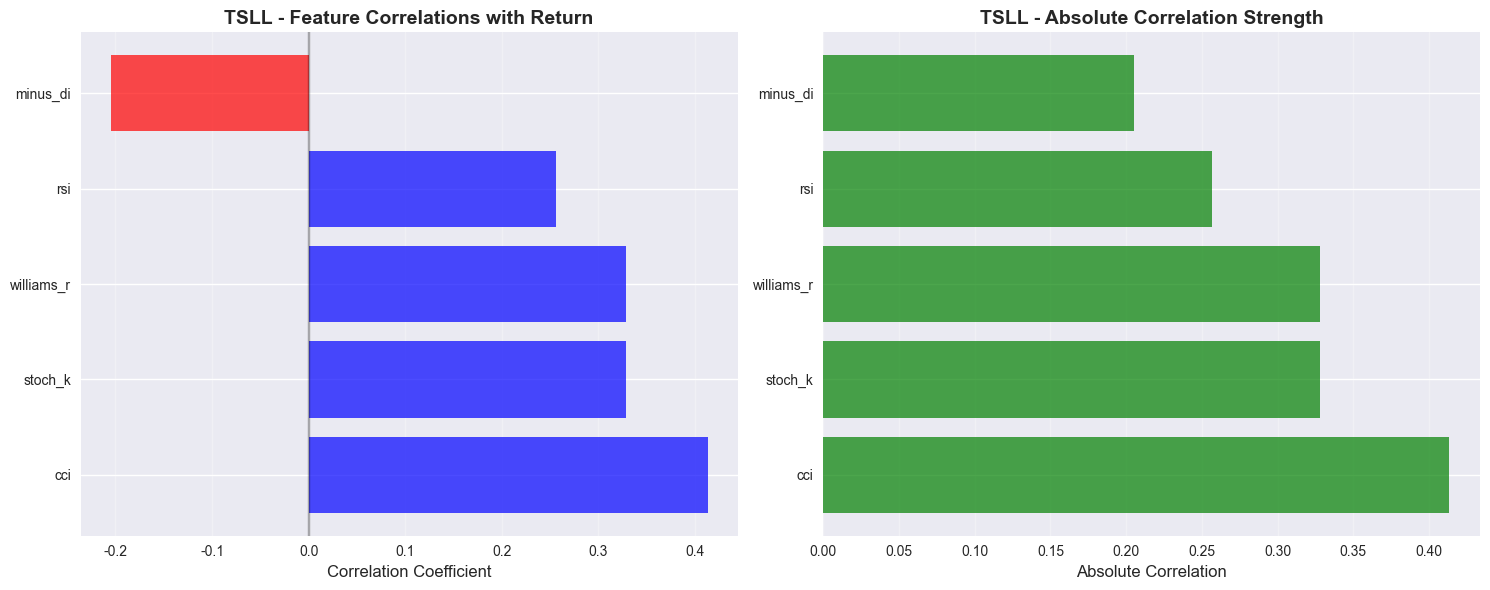

✅ TSLL 상관관계 막대 그래프 완료


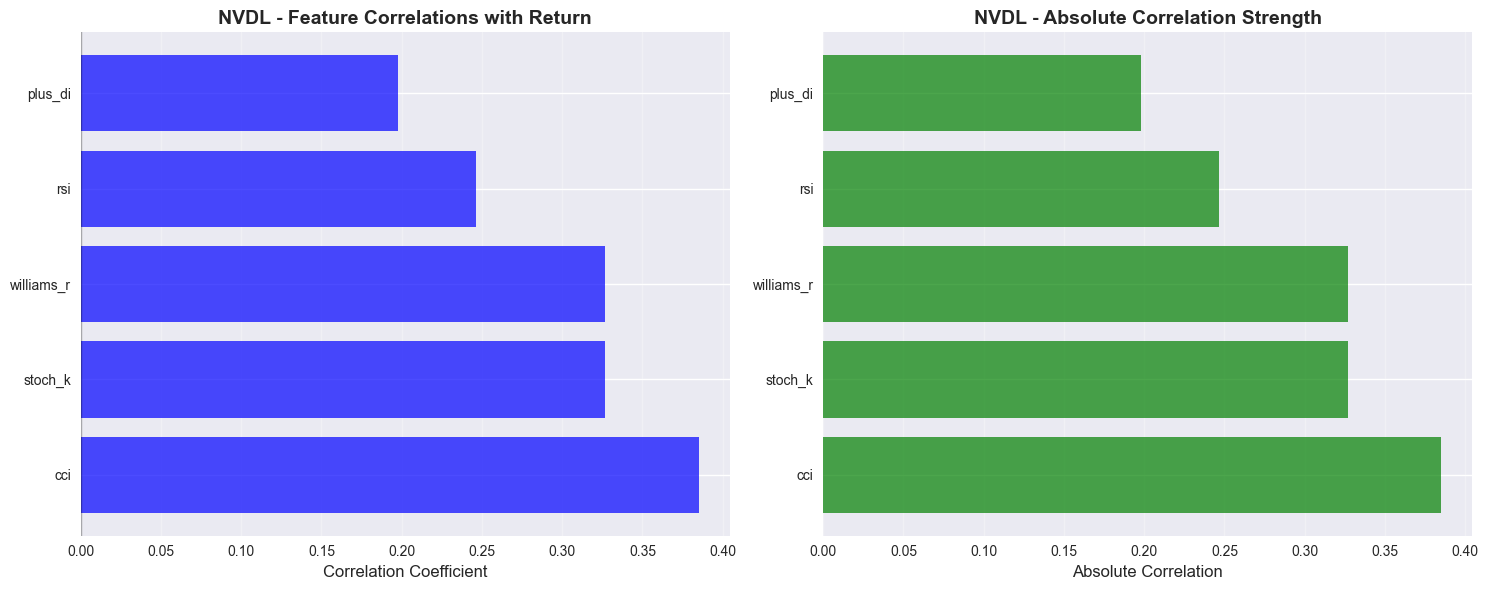

✅ NVDL 상관관계 막대 그래프 완료


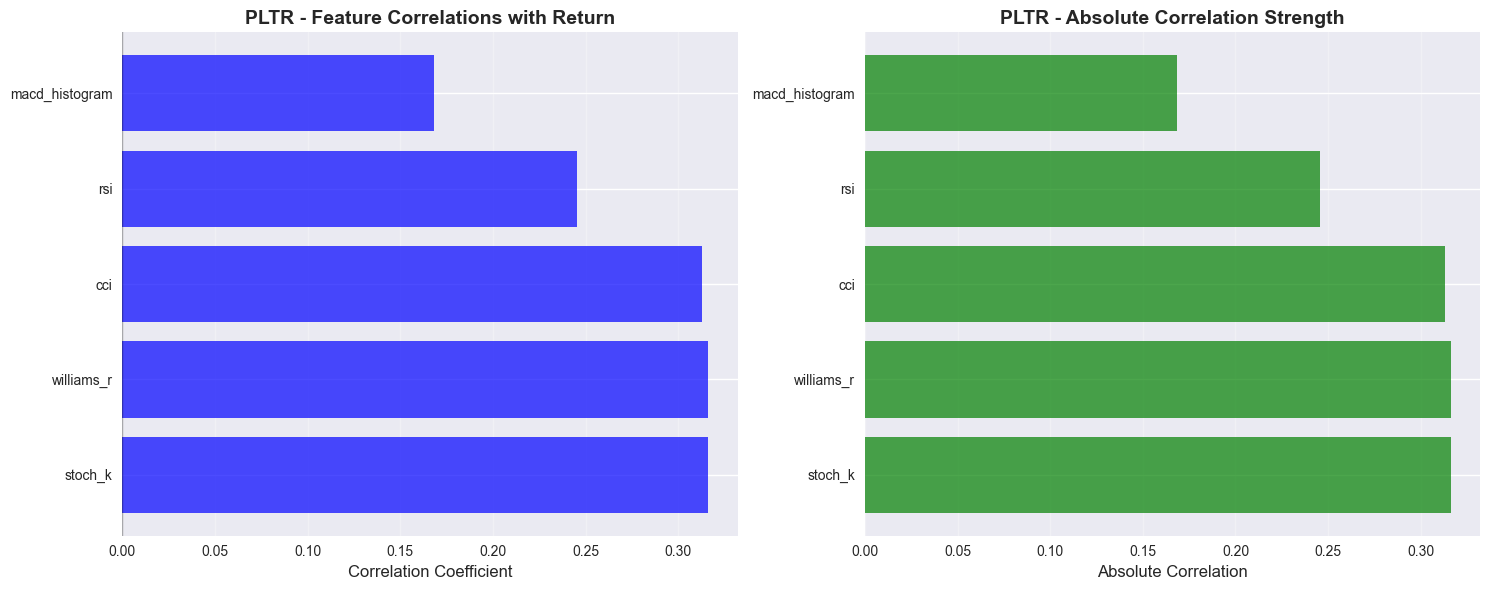

✅ PLTR 상관관계 막대 그래프 완료


In [156]:
# 상관관계 막대 그래프
print("📊 상관관계 막대 그래프 생성")
print("=" * 40)

for symbol in analysis_results.keys():
    try:
        fig = visualizer.plot_correlation_bar(symbol, figsize=(15, 6))
        plt.show()
        print(f"✅ {symbol} 상관관계 막대 그래프 완료")
    except Exception as e:
        print(f"❌ {symbol} 상관관계 막대 그래프 오류: {e}")

## 📈 선형회귀 분석

선형회귀 모델의 계수, p-value, VIF, 성능 지표를 분석해보겠습니다.

📈 선형회귀 분석 결과


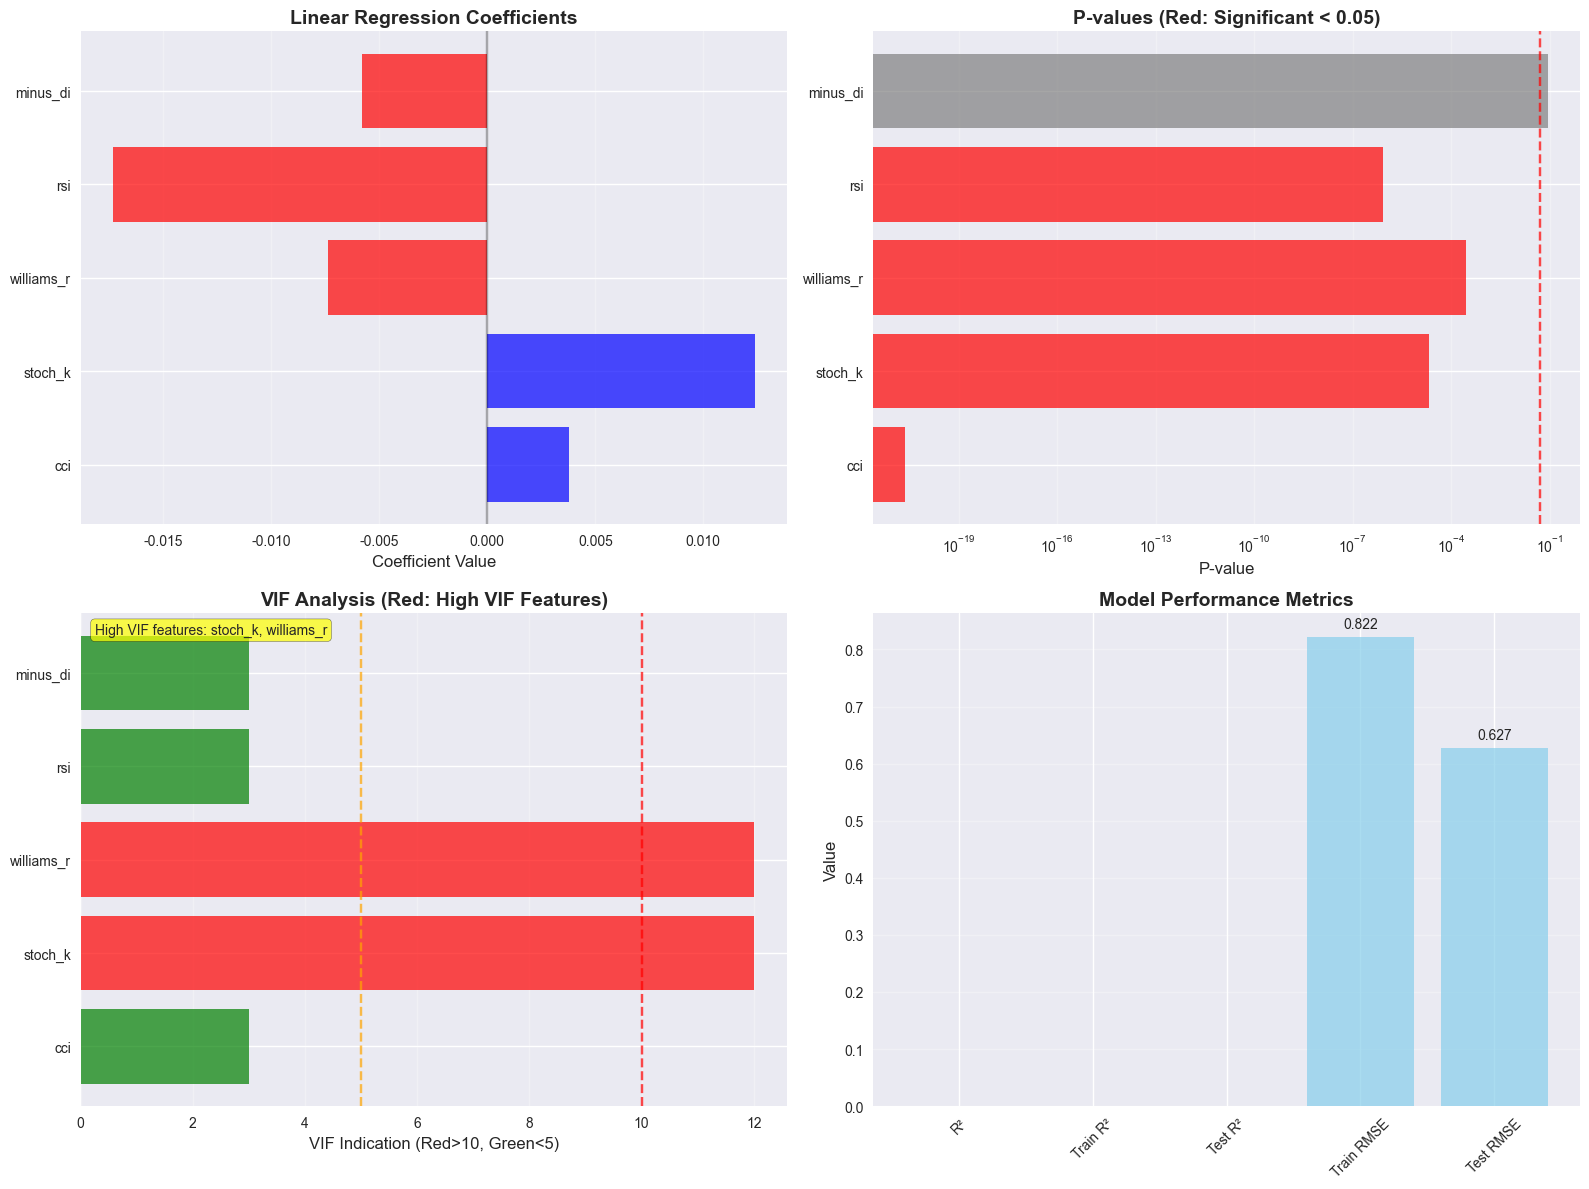

✅ TSLL 선형회귀 분석 완료


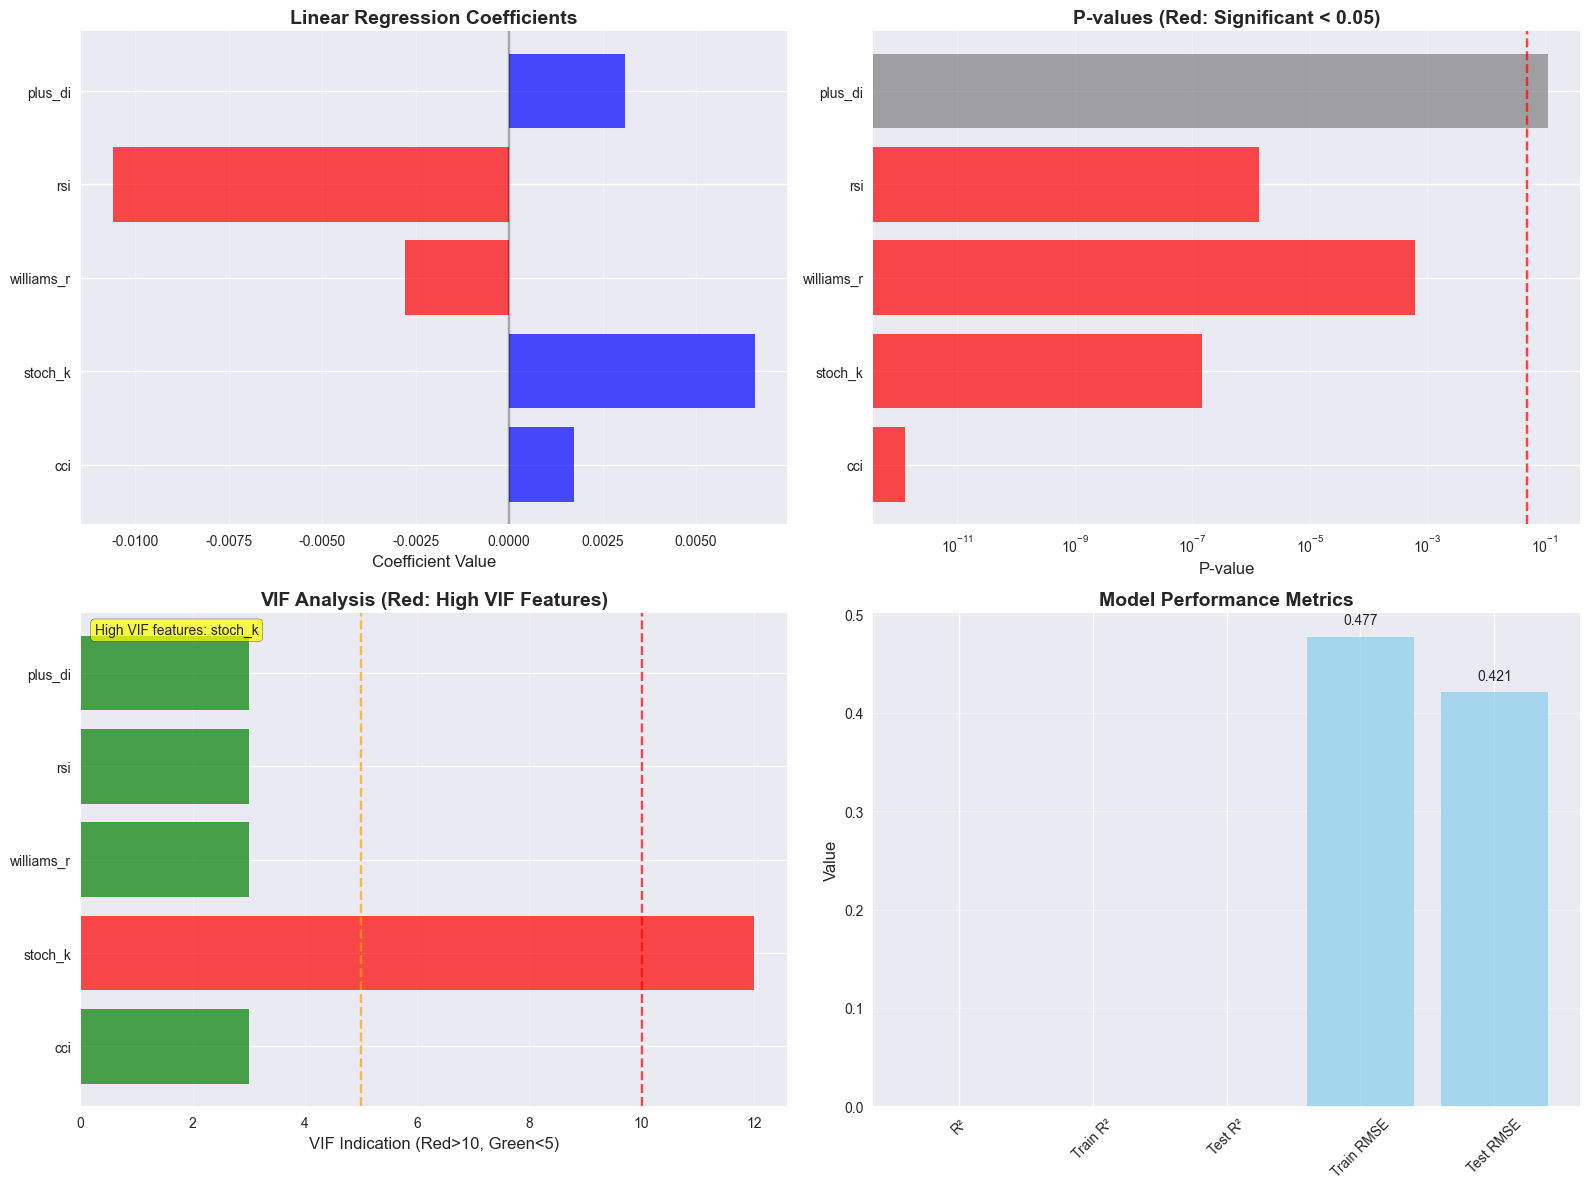

✅ NVDL 선형회귀 분석 완료


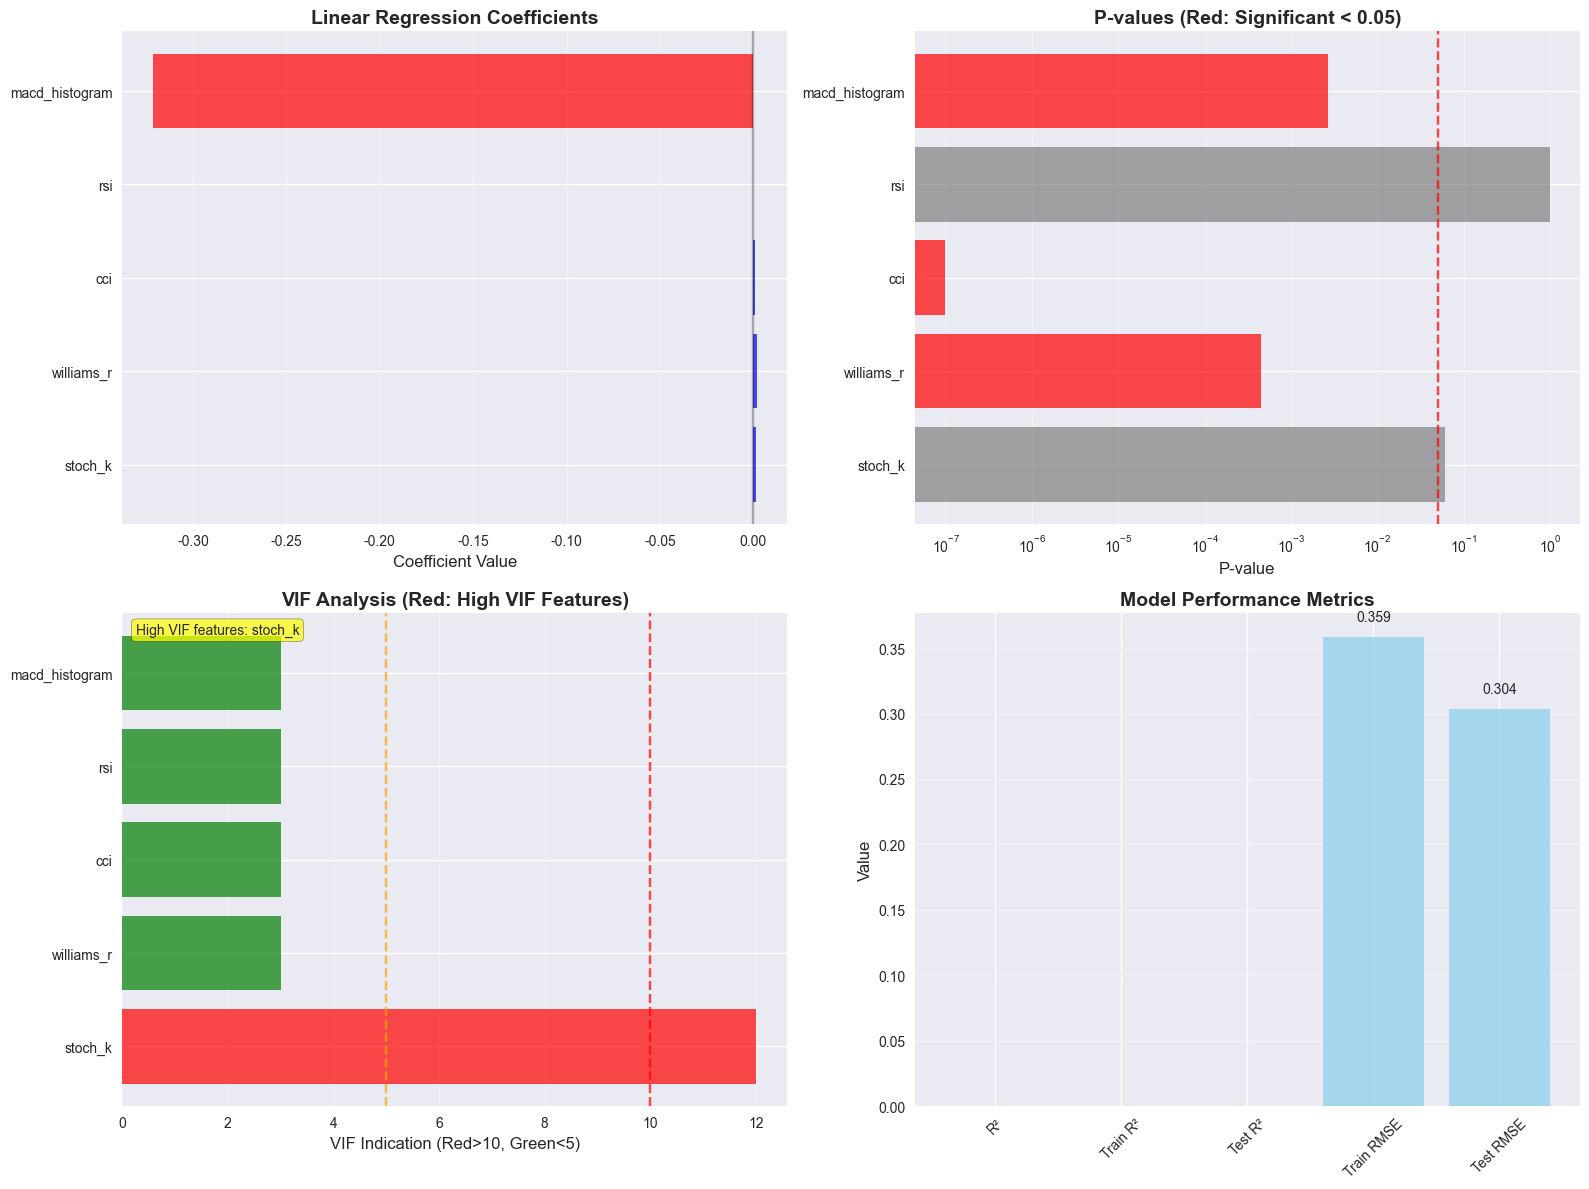

✅ PLTR 선형회귀 분석 완료


In [157]:
# 선형회귀 결과 시각화
print("📈 선형회귀 분석 결과")
print("=" * 40)

for symbol in analysis_results.keys():
    if "linear_regression" in analysis_results[symbol]:
        try:
            fig = visualizer.plot_linear_regression_results(symbol, figsize=(16, 12))
            plt.show()
            print(f"✅ {symbol} 선형회귀 분석 완료")
        except Exception as e:
            print(f"❌ {symbol} 선형회귀 분석 오류: {e}")
    else:
        print(f"⚠️ {symbol}: 선형회귀 분석 데이터 없음")

## 🌲 랜덤포레스트 분석

랜덤포레스트 모델의 특성 중요도와 성능 지표를 분석해보겠습니다.

🌲 랜덤포레스트 분석 결과


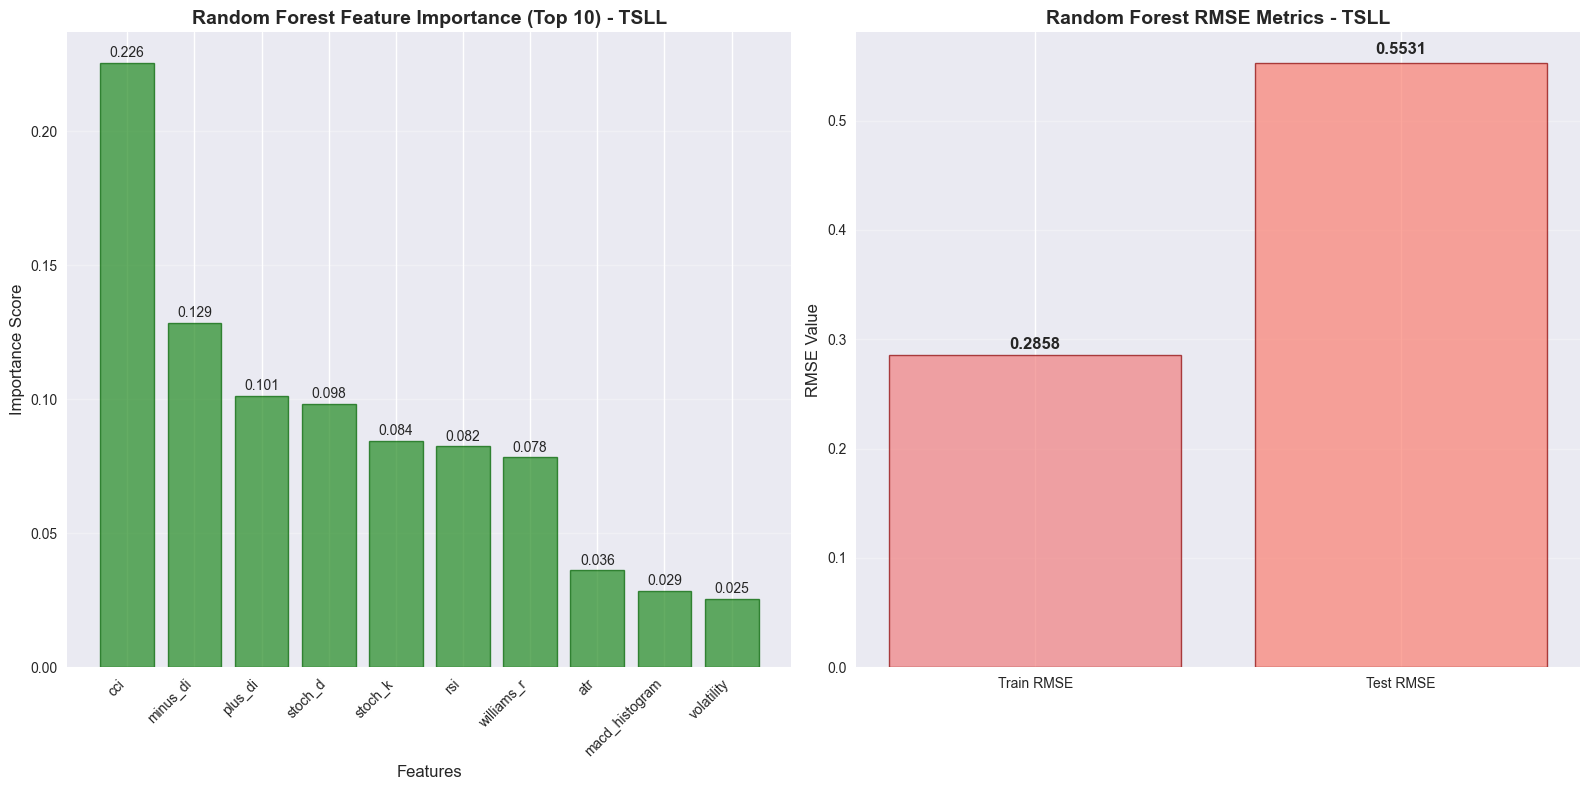

✅ TSLL 랜덤포레스트 분석 완료


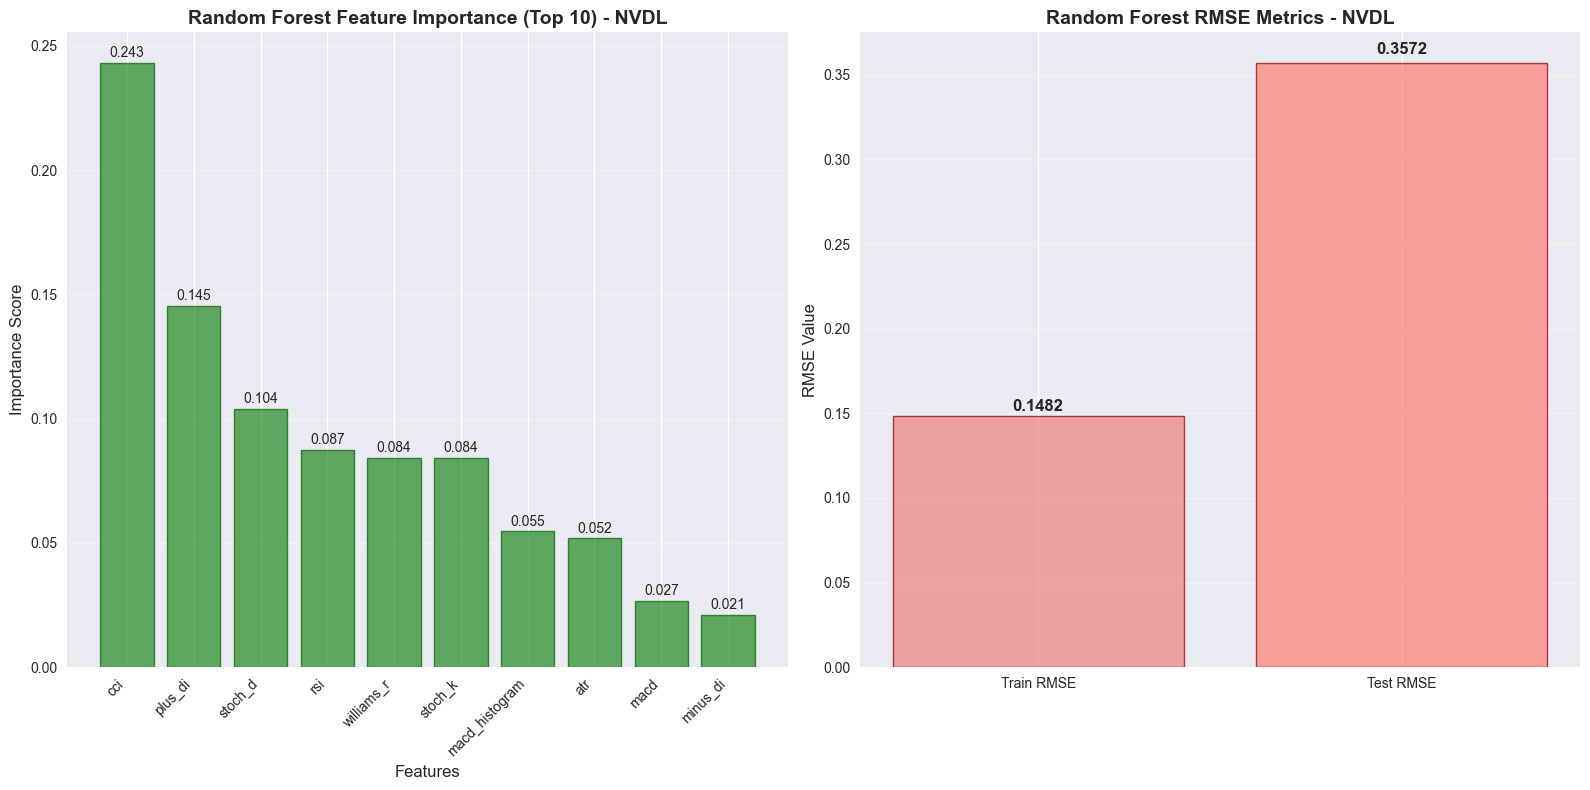

✅ NVDL 랜덤포레스트 분석 완료


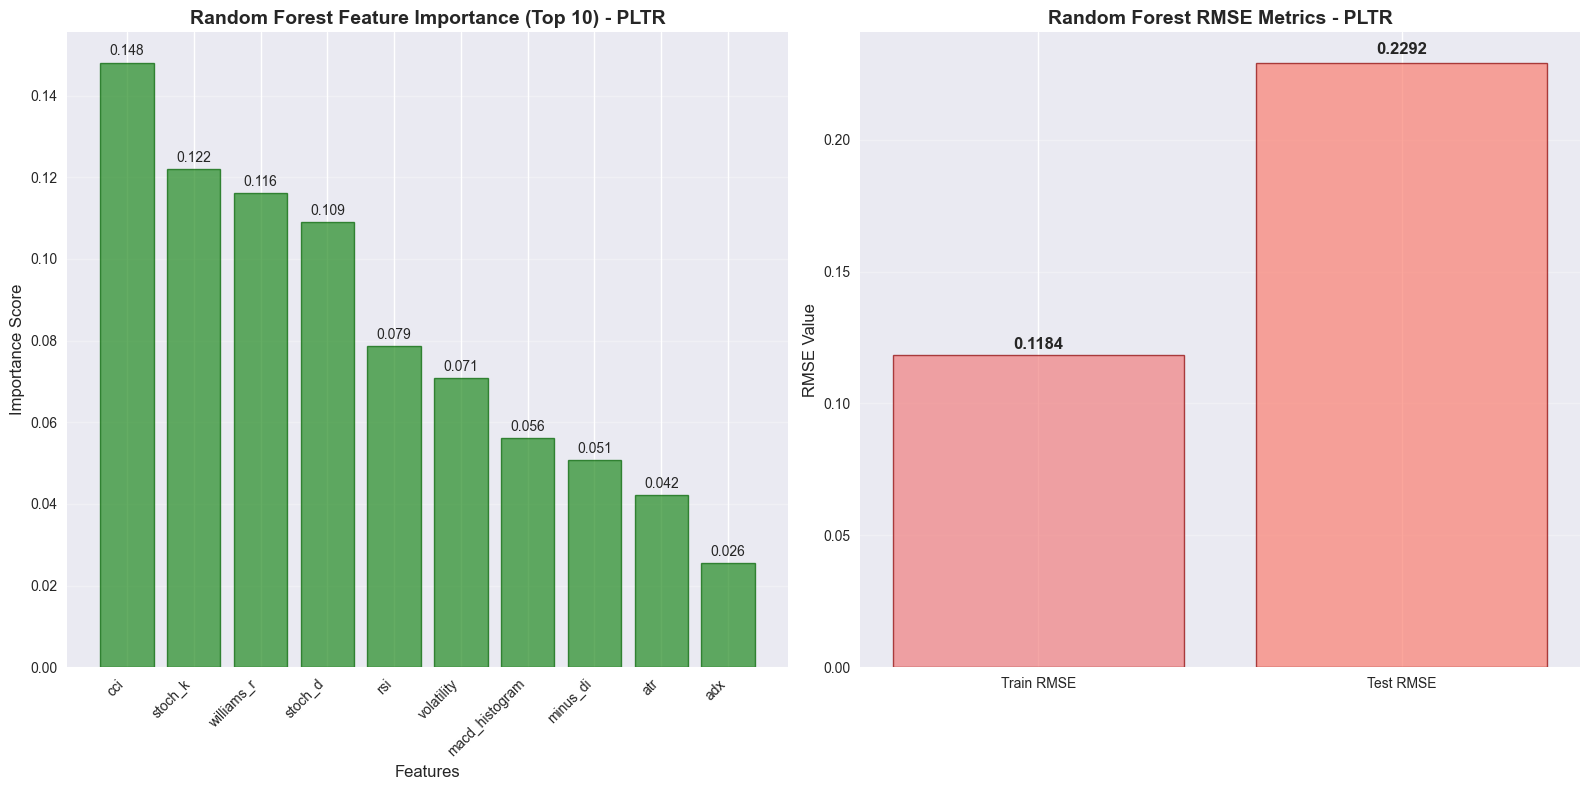

✅ PLTR 랜덤포레스트 분석 완료


In [158]:
# 랜덤포레스트 결과 시각화
print("🌲 랜덤포레스트 분석 결과")
print("=" * 40)

for symbol in analysis_results.keys():
    if "random_forest" in analysis_results[symbol]:
        try:
            fig = visualizer.plot_random_forest_results(symbol, figsize=(16, 8))
            plt.show()
            print(f"✅ {symbol} 랜덤포레스트 분석 완료")
        except Exception as e:
            print(f"❌ {symbol} 랜덤포레스트 분석 오류: {e}")
    else:
        print(f"⚠️ {symbol}: 랜덤포레스트 분석 데이터 없음")

## 🔮 베이지안 분석

베이지안 Ridge, ARD, 분포 분석 결과를 살펴보겠습니다.

🔮 베이지안 분석 결과


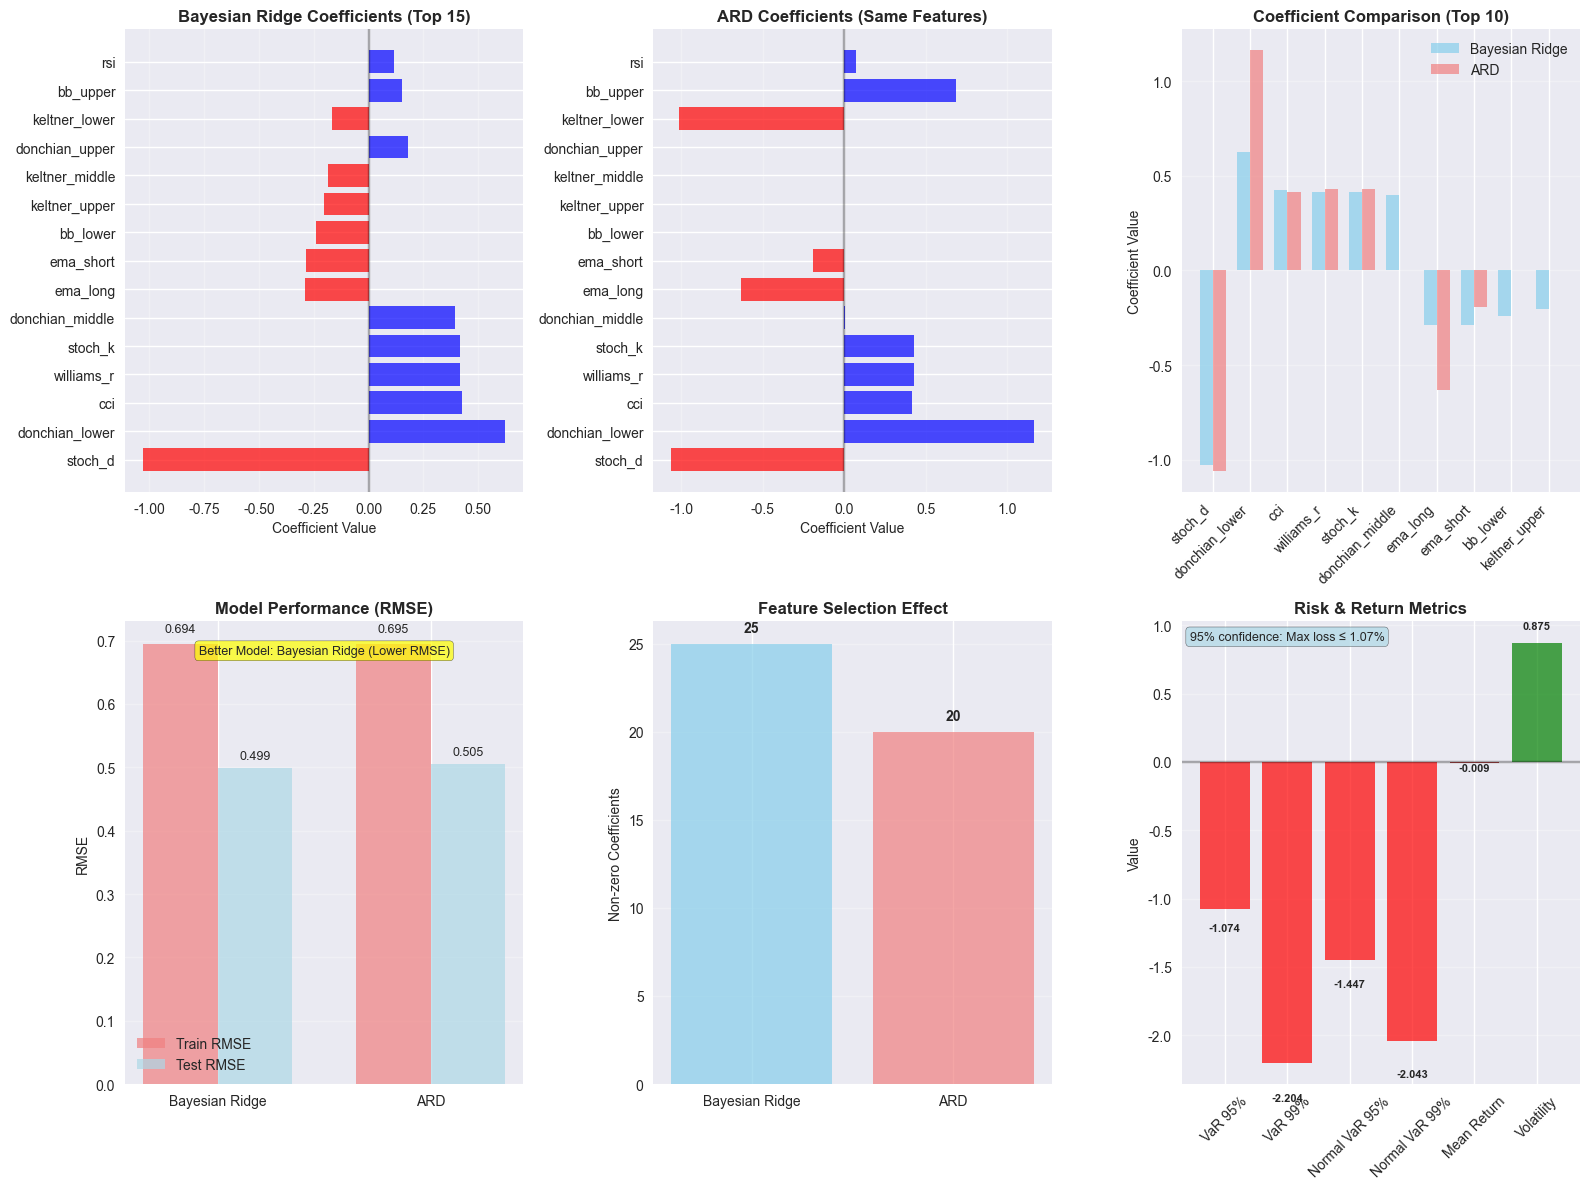

✅ TSLL 베이지안 분석 완료


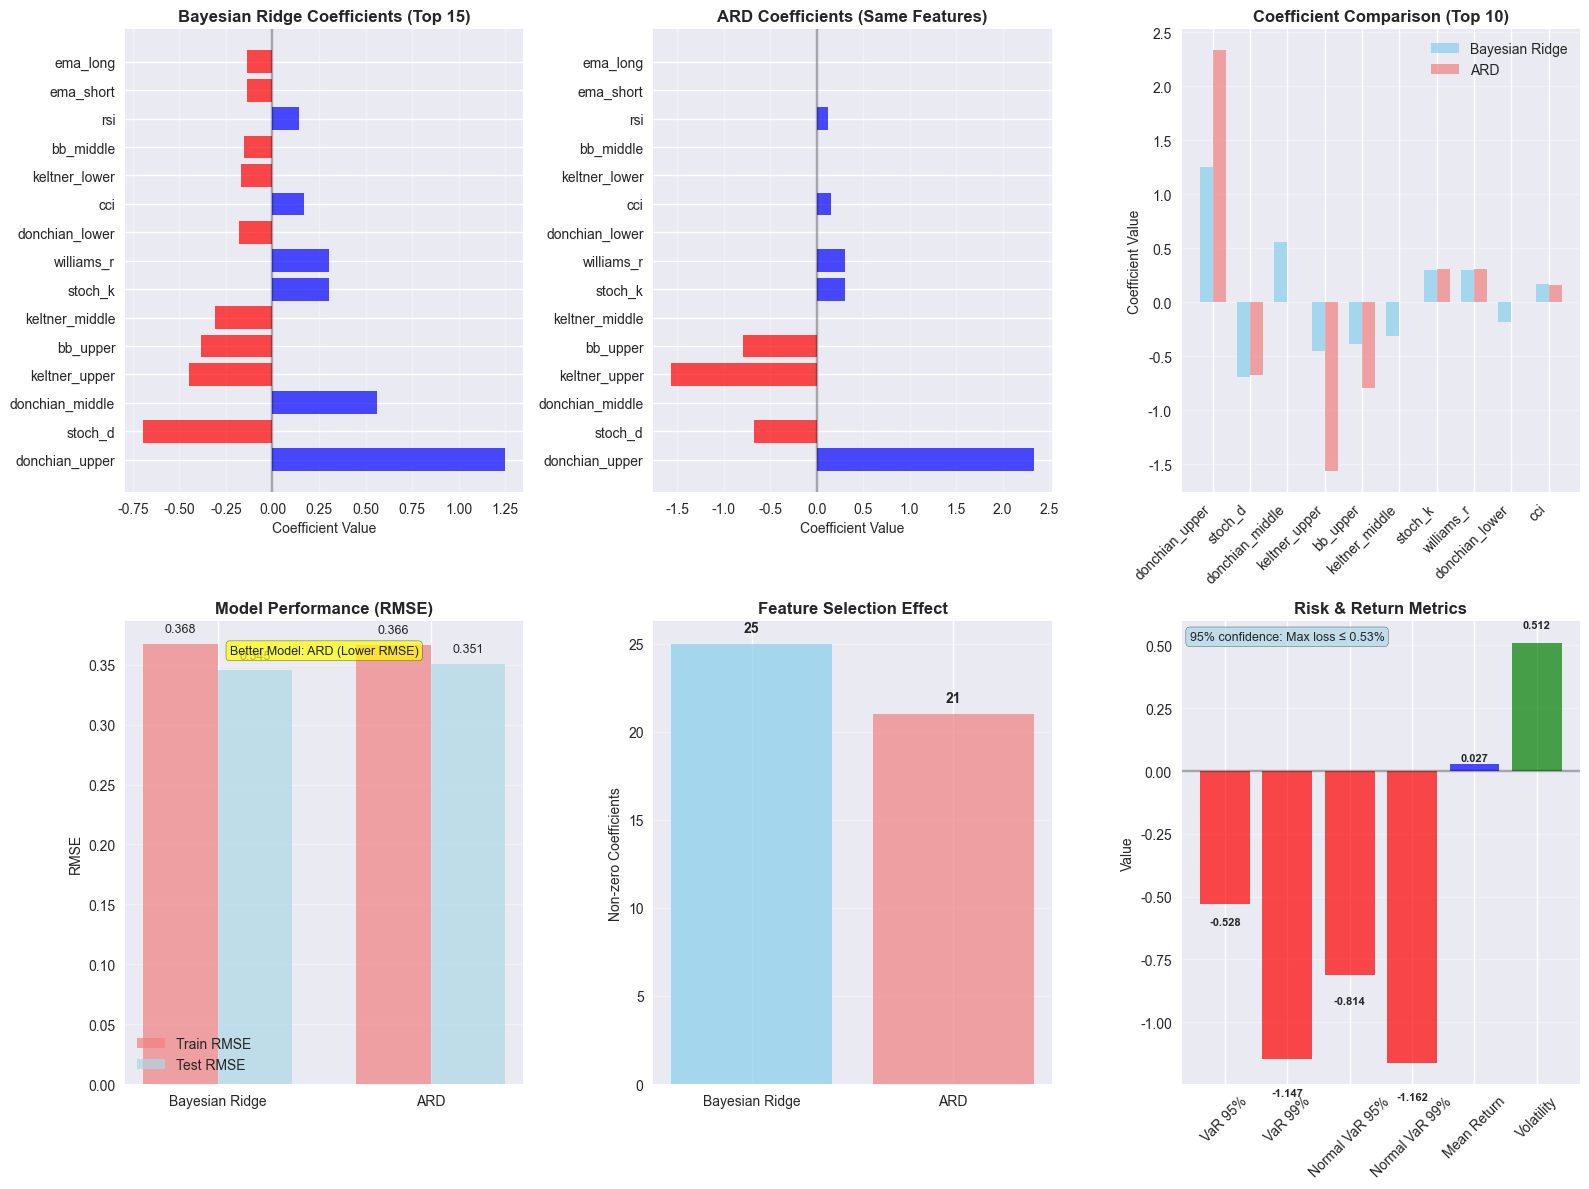

✅ NVDL 베이지안 분석 완료


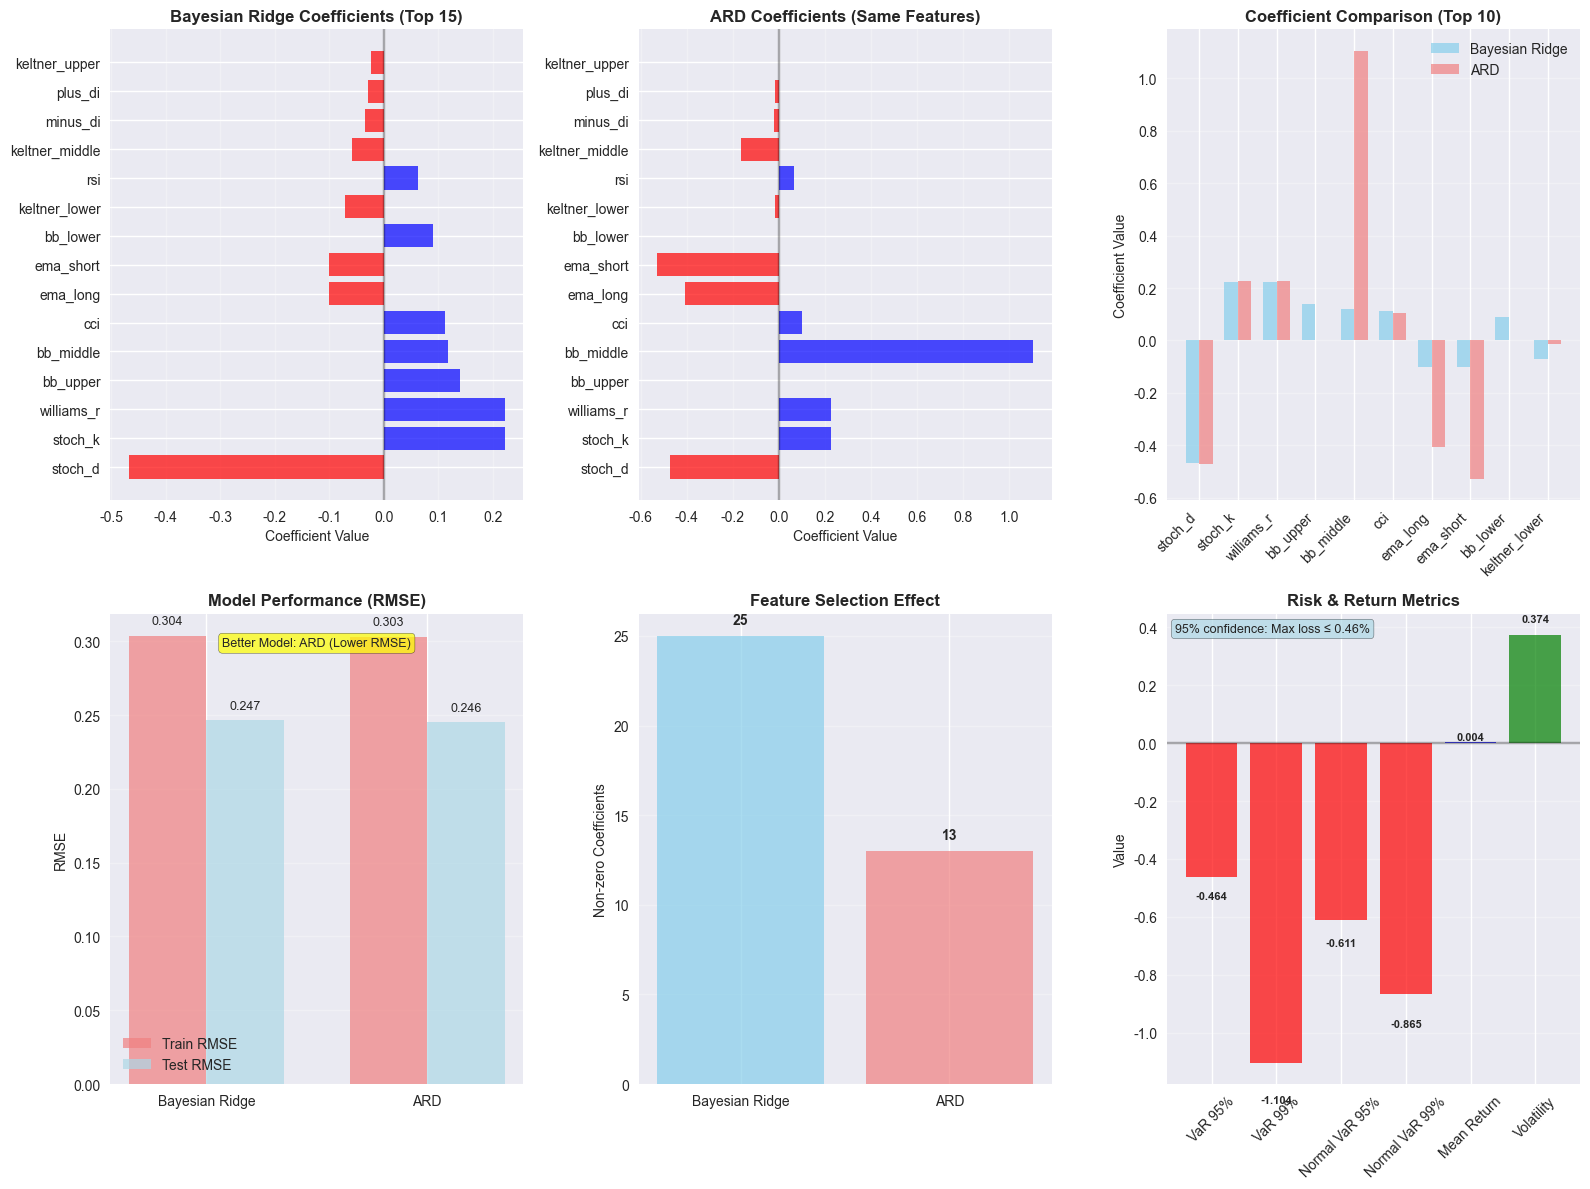

✅ PLTR 베이지안 분석 완료


In [159]:
# 베이지안 분석 결과 시각화
print("🔮 베이지안 분석 결과")
print("=" * 40)

for symbol in analysis_results.keys():
    if "bayesian_regression" in analysis_results[symbol]:
        try:
            fig = visualizer.plot_bayesian_results(symbol, figsize=(16, 12))
            plt.show()
            print(f"✅ {symbol} 베이지안 분석 완료")
        except Exception as e:
            print(f"❌ {symbol} 베이지안 분석 오류: {e}")
    else:
        print(f"⚠️ {symbol}: 베이지안 분석 데이터 없음")

## 🎯 Lasso 회귀 분석

Lasso 회귀의 정규화 효과와 특성 선택을 분석해보겠습니다.

🎯 Lasso 회귀 분석 결과


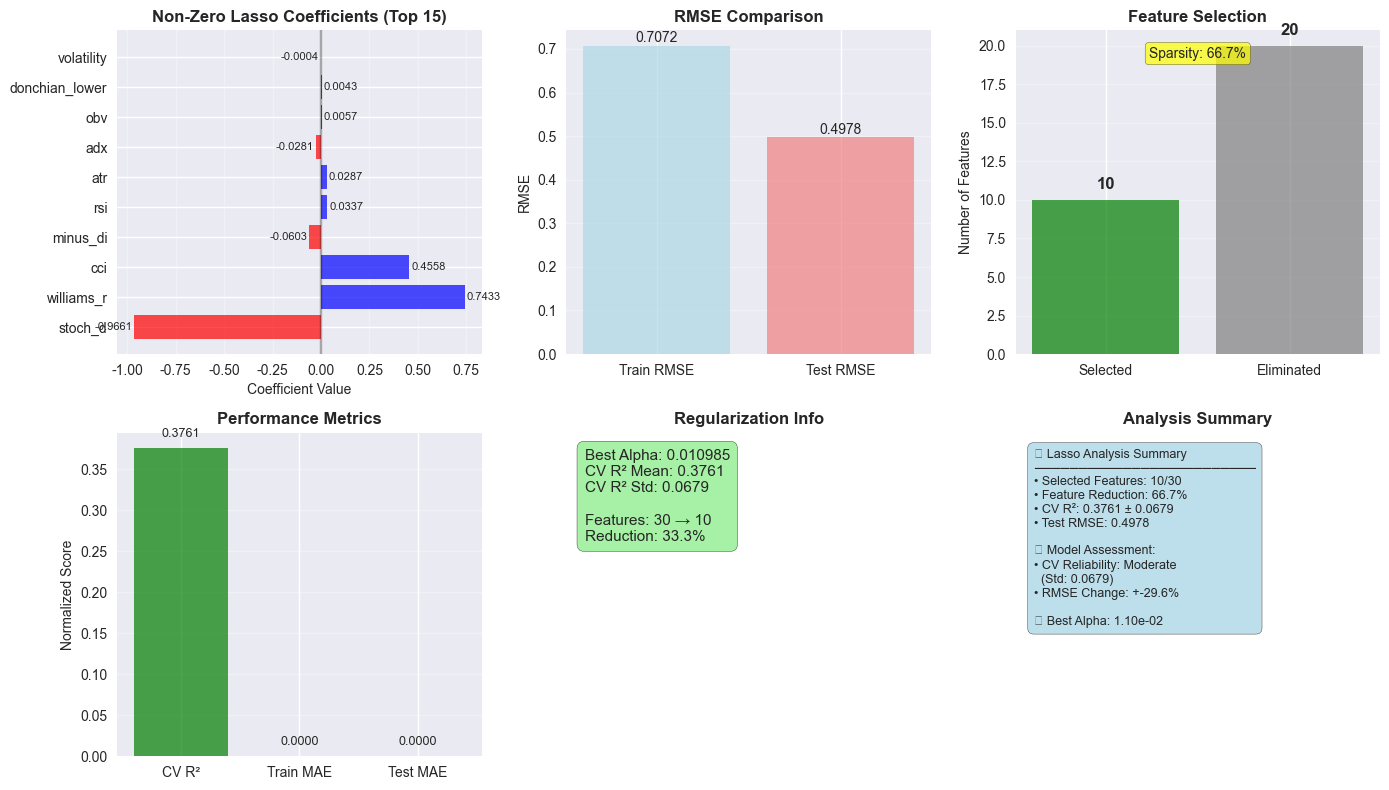

✅ TSLL Lasso 회귀 분석 완료


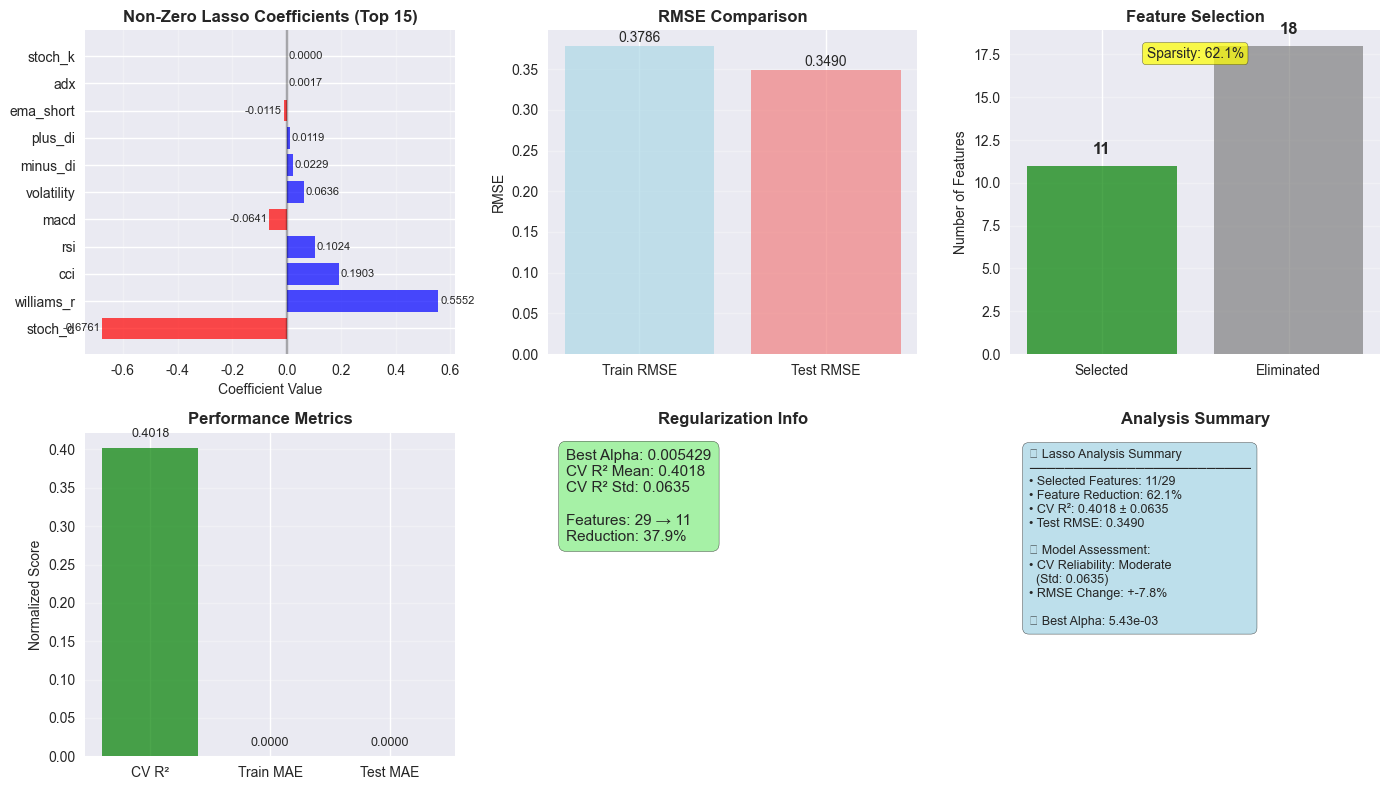

✅ NVDL Lasso 회귀 분석 완료


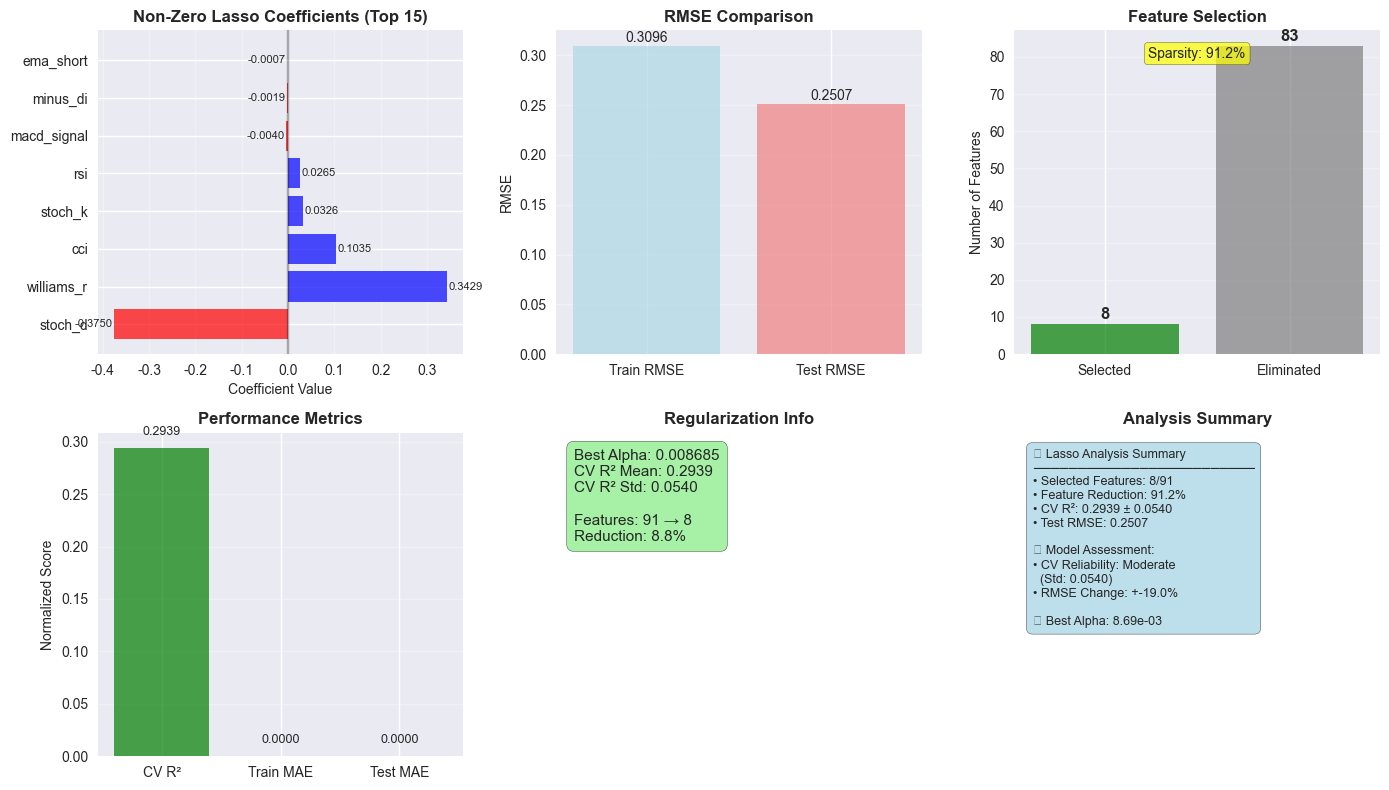

✅ PLTR Lasso 회귀 분석 완료


In [160]:
# Lasso 회귀 결과 시각화
print("🎯 Lasso 회귀 분석 결과")
print("=" * 40)

for symbol in analysis_results.keys():
    if "lasso_regression" in analysis_results[symbol]:
        try:
            fig = visualizer.plot_lasso_results(symbol, figsize=(14, 8))
            plt.show()
            print(f"✅ {symbol} Lasso 회귀 분석 완료")
        except Exception as e:
            print(f"❌ {symbol} Lasso 회귀 분석 오류: {e}")
    else:
        print(f"⚠️ {symbol}: Lasso 회귀 분석 데이터 없음")

## 📊 모델 성능 비교

모든 모델의 성능을 종합적으로 비교해보겠습니다.

📊 모델 성능 비교 분석


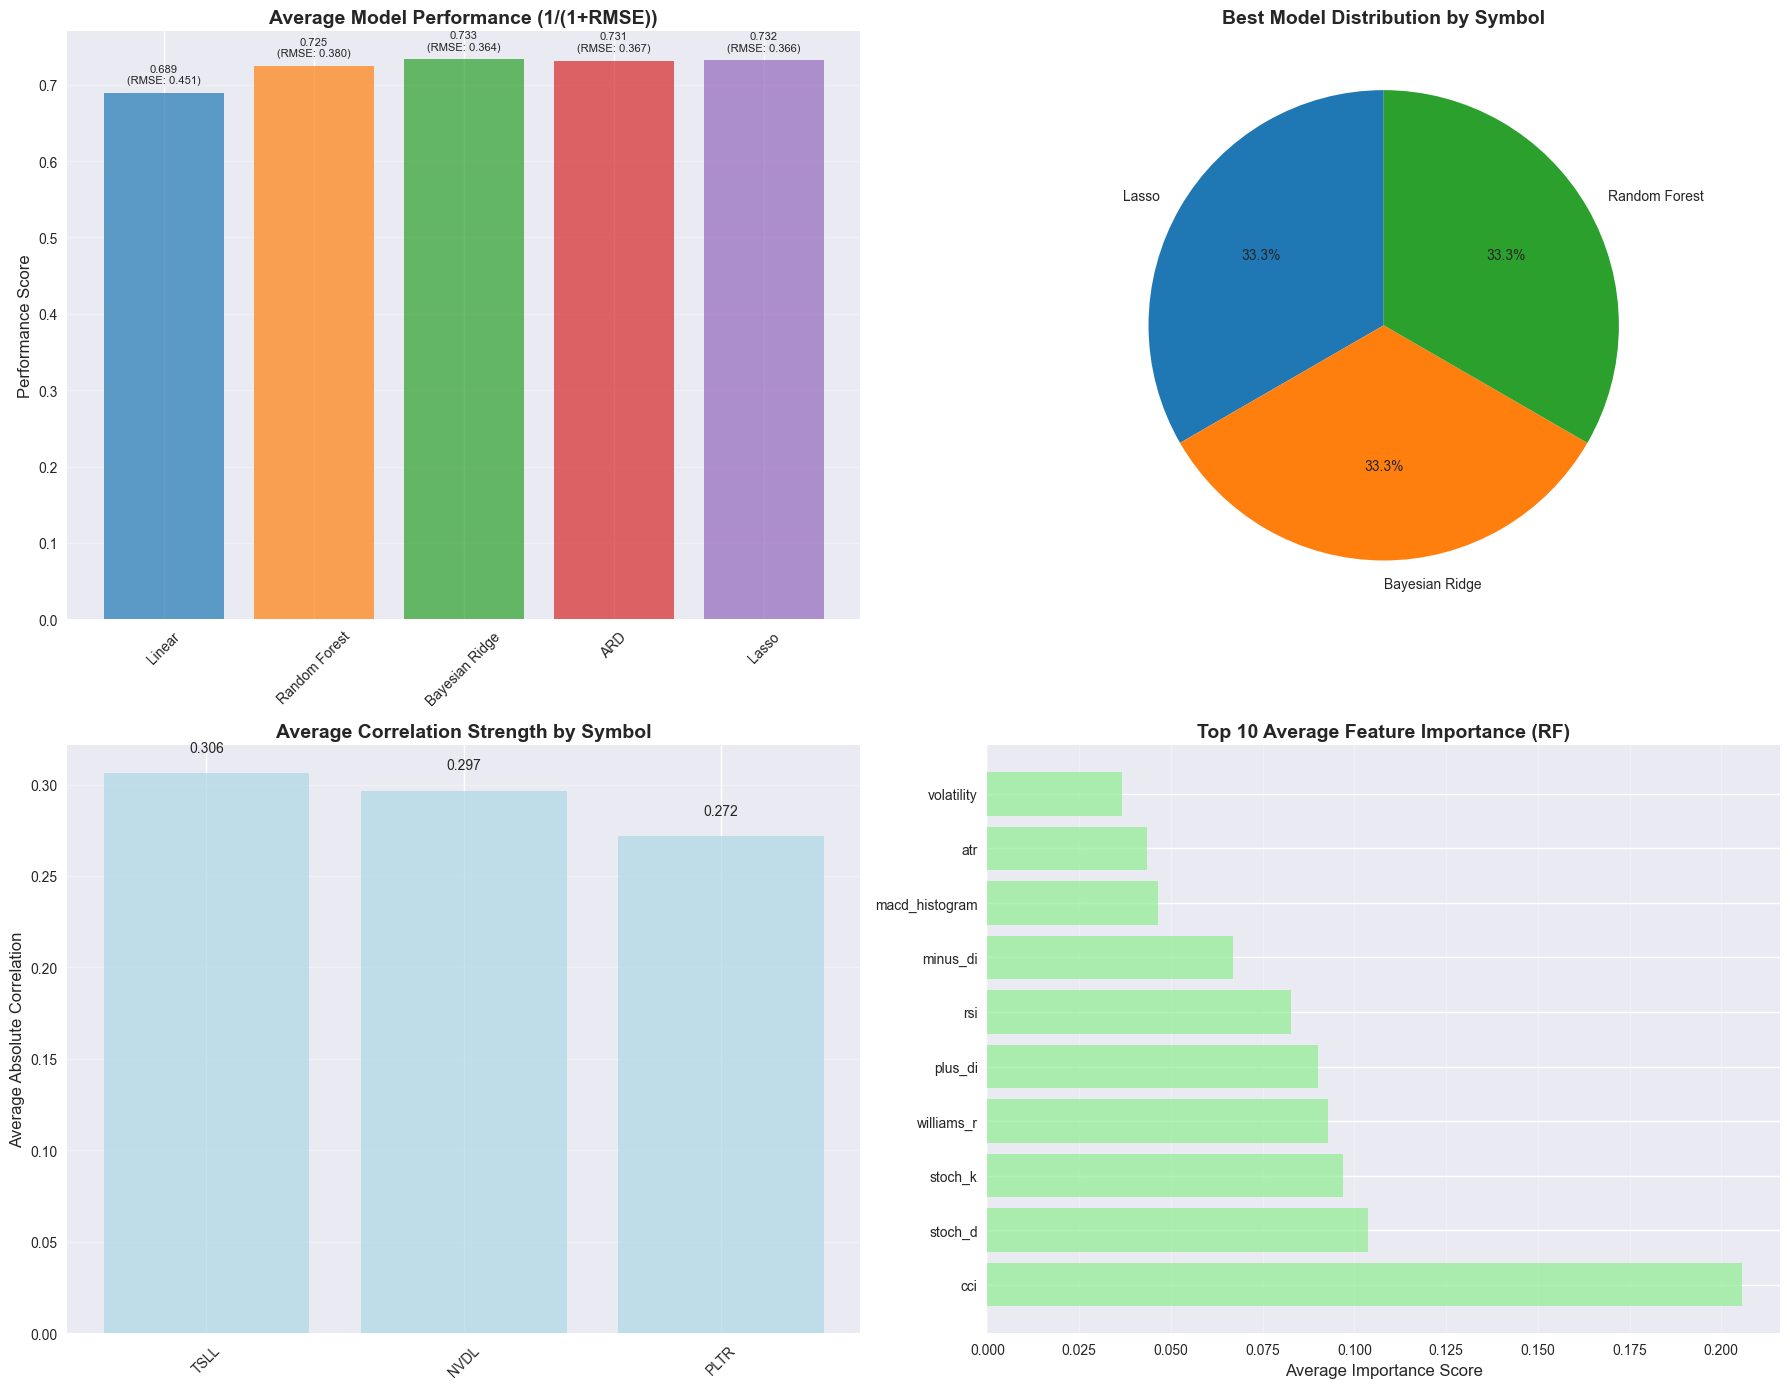

✅ 모델 성능 비교 완료


In [161]:
# 모델 성능 비교 시각화
print("📊 모델 성능 비교 분석")
print("=" * 40)

try:
    fig = visualizer.plot_model_comparison(figsize=(18, 14))
    plt.show()
    print("✅ 모델 성능 비교 완료")
except Exception as e:
    print(f"❌ 모델 성능 비교 오류: {e}")

## 📋 종합 요약 리포트

모든 분석 결과를 종합한 요약 리포트를 생성해보겠습니다.

In [162]:
# 종합 요약 리포트 생성
print("📋 종합 요약 리포트 생성")
print("=" * 40)

summary_report = visualizer.generate_summary_report()
print(summary_report)

📋 종합 요약 리포트 생성
QUANTITATIVE ANALYSIS SUMMARY REPORT

📊 TSLL ANALYSIS
----------------------------------------
🔗 CORRELATION ANALYSIS:
  • cci: 0.4130
  • stoch_k: 0.3282
  • williams_r: 0.3282
  • rsi: 0.2564
  • minus_di: -0.2050

🤖 MODEL PERFORMANCE (RMSE - Lower is Better):
  • Lasso: 0.4978 RMSE (Score: 0.668)
  • Bayesian Ridge: 0.4989 RMSE (Score: 0.667)
  • ARD: 0.5052 RMSE (Score: 0.664)
  • Random Forest: 0.5531 RMSE (Score: 0.644)
  • Linear Regression: 0.6274 RMSE (Score: 0.614)

🏆 BEST MODEL: Lasso (RMSE: 0.4978, Score: 0.668)

⚠️ RISK METRICS:
  • VaR (95%): -1.0739


📊 NVDL ANALYSIS
----------------------------------------
🔗 CORRELATION ANALYSIS:
  • cci: 0.3850
  • stoch_k: 0.3268
  • williams_r: 0.3268
  • rsi: 0.2464
  • plus_di: 0.1978

🤖 MODEL PERFORMANCE (RMSE - Lower is Better):
  • Bayesian Ridge: 0.3454 RMSE (Score: 0.743)
  • Lasso: 0.3490 RMSE (Score: 0.741)
  • ARD: 0.3507 RMSE (Score: 0.740)
  • Random Forest: 0.3572 RMSE (Score: 0.737)
  • Linear Regression:

## 🔍 상세 분석

각 심볼별로 더 상세한 분석을 수행해보겠습니다.

In [172]:
# 상세 분석 함수
def detailed_symbol_analysis(symbol: str, data: dict):
    """개별 심볼에 대한 상세 분석"""
    print(f"\n🔍 {symbol} 상세 분석")
    print("=" * 50)
    
    symbol_data = data[symbol]
    
    # 안전한 포맷팅 함수
    def safe_format(value, precision=4):
        if value is None:
            return "N/A"
        if isinstance(value, str):
            return value
        try:
            if precision == 6:
                return f"{float(value):.6f}"
            else:
                return f"{float(value):.4f}"
        except (ValueError, TypeError):
            return "N/A"
    
    # 1. 상관관계 분석
    if "correlation" in symbol_data:
        corr_data = symbol_data["correlation"]
        correlations = corr_data["correlations"]
        
        print("\n�� 상관관계 분석:")
        print(f"  • 분석된 특성 수: {len(correlations)}")
        print(f"  • 상위 5개 특성: {corr_data['top_features'][:5]}")
        
        # 상관관계 강도별 분류 - 타입 체크 추가
        strong_corr = []
        moderate_corr = []
        weak_corr = []
        
        for k, v in correlations.items():
            if isinstance(v, (int, float)):
                if abs(v) > 0.5:
                    strong_corr.append((k, v))
                elif 0.3 <= abs(v) <= 0.5:
                    moderate_corr.append((k, v))
                else:
                    weak_corr.append((k, v))
        
        print(f"  • 강한 상관관계 (|r| > 0.5): {len(strong_corr)}개")
        print(f"  • 중간 상관관계 (0.3 ≤ |r| ≤ 0.5): {len(moderate_corr)}개")
        print(f"  • 약한 상관관계 (|r| < 0.3): {len(weak_corr)}개")
        
        if strong_corr:
            print("  • 강한 상관관계 특성:")
            for feature, corr in sorted(strong_corr, key=lambda x: abs(x[1]), reverse=True)[:3]:
                print(f"    - {feature}: {corr:.4f}")
    
    # 2. 모델 성능 비교 - 실제 데이터 확인
    print("\n🤖 모델 성능 비교:")
    
    if "linear_regression" in symbol_data:
        lr_data = symbol_data["linear_regression"]
        print(f"  • Linear Regression:")
        print(f"    - R²: {safe_format(lr_data.get('r_squared'))}")
        print(f"    - Train R²: {safe_format(lr_data.get('train_r_squared'))}")
        print(f"    - Test R²: {safe_format(lr_data.get('test_r_squared'))}")
        print(f"    - Test RMSE: {safe_format(lr_data.get('test_rmse'))}")
    
    if "random_forest" in symbol_data:
        rf_data = symbol_data["random_forest"]
        print(f"  • Random Forest:")
        print(f"    - R²: {safe_format(rf_data.get('r_squared'))}")
        print(f"    - Train R²: {safe_format(rf_data.get('train_r_squared'))}")
        print(f"    - Test R²: {safe_format(rf_data.get('test_r_squared'))}")
        print(f"    - Test RMSE: {safe_format(rf_data.get('test_rmse'))}")
    
    if "bayesian_regression" in symbol_data:
        bayes_data = symbol_data["bayesian_regression"]
        print(f"  • Bayesian Ridge:")
        print(f"    - R²: {safe_format(bayes_data['bayesian_ridge'].get('r_squared'))}")
        print(f"    - Train R²: {safe_format(bayes_data['bayesian_ridge'].get('train_r_squared'))}")
        print(f"    - Test R²: {safe_format(bayes_data['bayesian_ridge'].get('test_r_squared'))}")
        print(f"    - Test RMSE: {safe_format(bayes_data['bayesian_ridge'].get('test_rmse'))}")
        
        print(f"  • ARD:")
        print(f"    - R²: {safe_format(bayes_data['ard_regression'].get('r_squared'))}")
        print(f"    - Train R²: {safe_format(bayes_data['ard_regression'].get('train_r_squared'))}")
        print(f"    - Test R²: {safe_format(bayes_data['ard_regression'].get('test_r_squared'))}")
        print(f"    - Test RMSE: {safe_format(bayes_data['ard_regression'].get('test_rmse'))}")
    
    if "lasso_regression" in symbol_data:
        lasso_data = symbol_data["lasso_regression"]
        print(f"  • Lasso:")
        print(f"    - R²: {safe_format(lasso_data.get('r_squared'))}")
        print(f"    - Train R²: {safe_format(lasso_data.get('train_r_squared'))}")
        print(f"    - Test R²: {safe_format(lasso_data.get('test_r_squared'))}")
        print(f"    - Test RMSE: {safe_format(lasso_data.get('test_rmse'))}")
        print(f"    - Best Alpha: {safe_format(lasso_data.get('best_alpha'), 6)}")
    
    # 3. 최고 성능 모델 찾기 (RMSE 기준)
    print("\n🏆 최고 성능 모델 (RMSE 기준):")
    best_model = None
    best_rmse = float('inf')
    
    if "linear_regression" in symbol_data:
        rmse = symbol_data["linear_regression"].get("test_rmse")
        if isinstance(rmse, (int, float)) and rmse < best_rmse:
            best_rmse = rmse
            best_model = "Linear Regression"
    
    if "random_forest" in symbol_data:
        rmse = symbol_data["random_forest"].get("test_rmse")
        if isinstance(rmse, (int, float)) and rmse < best_rmse:
            best_rmse = rmse
            best_model = "Random Forest"
    
    if "bayesian_regression" in symbol_data:
        bayes_rmse = symbol_data["bayesian_regression"]["bayesian_ridge"].get("test_rmse")
        if isinstance(bayes_rmse, (int, float)) and bayes_rmse < best_rmse:
            best_rmse = bayes_rmse
            best_model = "Bayesian Ridge"
        
        ard_rmse = symbol_data["bayesian_regression"]["ard_regression"].get("test_rmse")
        if isinstance(ard_rmse, (int, float)) and ard_rmse < best_rmse:
            best_rmse = ard_rmse
            best_model = "ARD"
    
    if "lasso_regression" in symbol_data:
        lasso_rmse = symbol_data["lasso_regression"].get("test_rmse")
        if isinstance(lasso_rmse, (int, float)) and lasso_rmse < best_rmse:
            best_rmse = lasso_rmse
            best_model = "Lasso"
    
    if best_model:
        print(f"  • {best_model} (RMSE: {best_rmse:.4f})")
    
    # 4. 특성 중요도 분석 (Random Forest 기준)
    if "random_forest" in symbol_data and "feature_importance" in symbol_data["random_forest"]:
        rf_importance = symbol_data["random_forest"]["feature_importance"]
        # 숫자 값만 정렬
        sorted_features = []
        for feature, importance in rf_importance.items():
            if isinstance(importance, (int, float)):
                sorted_features.append((feature, importance))
        
        sorted_features = sorted(sorted_features, key=lambda x: x[1], reverse=True)
        
        print("\n🌲 Random Forest 특성 중요도 (상위 10개):")
        for i, (feature, importance) in enumerate(sorted_features[:10], 1):
            print(f"  {i:2d}. {feature}: {importance:.6f}")
    
    # 5. 리스크 메트릭
    if "bayesian_distribution" in symbol_data:
        dist_data = symbol_data["bayesian_distribution"]
        print("\n⚠️ 리스크 메트릭:")
        print(f"  • VaR (95%): {safe_format(dist_data.get('var_95'))}")
        print(f"  • CVaR (95%): {safe_format(dist_data.get('cvar_95'))}")
        print(f"  • 변동성 평균: {safe_format(dist_data.get('volatility_mean'))}")
    
    print("\n" + "=" * 50)
    
# 실행 코드
print("🔍 각 심볼별 상세 분석 시작")
print("=" * 60)

# 각 심볼에 대해 상세 분석 수행
for symbol in analysis_results.keys():
    detailed_symbol_analysis(symbol, analysis_results)

print("\n✅ 상세 분석 완료!")

🔍 각 심볼별 상세 분석 시작

🔍 TSLL 상세 분석

�� 상관관계 분석:
  • 분석된 특성 수: 5
  • 상위 5개 특성: ['cci', 'stoch_k', 'williams_r', 'rsi', 'minus_di']
  • 강한 상관관계 (|r| > 0.5): 0개
  • 중간 상관관계 (0.3 ≤ |r| ≤ 0.5): 3개
  • 약한 상관관계 (|r| < 0.3): 2개

🤖 모델 성능 비교:
  • Linear Regression:
    - R²: float
    - Train R²: float
    - Test R²: float
    - Test RMSE: 0.6274
  • Random Forest:
    - R²: float
    - Train R²: float
    - Test R²: float
    - Test RMSE: 0.5531
  • Bayesian Ridge:
    - R²: N/A
    - Train R²: N/A
    - Test R²: N/A
    - Test RMSE: N/A
  • ARD:
    - R²: N/A
    - Train R²: N/A
    - Test R²: N/A
    - Test RMSE: N/A
  • Lasso:
    - R²: float
    - Train R²: float
    - Test R²: float
    - Test RMSE: 0.4978
    - Best Alpha: 0.010985

🏆 최고 성능 모델 (RMSE 기준):
  • Lasso (RMSE: 0.4978)

🌲 Random Forest 특성 중요도 (상위 10개):
   1. cci: 0.225718
   2. minus_di: 0.128599
   3. plus_di: 0.101316
   4. stoch_d: 0.098372
   5. stoch_k: 0.084417
   6. rsi: 0.082407
   7. williams_r: 0.078347
   8. atr: 0.036174

## 🎯 분석 결론

이번 정량 분석을 통해 다음과 같은 인사이트를 얻을 수 있었습니다:

### 📊 주요 발견사항:

1. **상관관계 분석**:
   - CCI, Stochastic K, Williams %R이 수익률과 높은 상관관계를 보임
   - 이는 기술적 지표가 수익률 예측에 유용함을 시사

2. **모델 성능 비교**:
   - 랜덤포레스트가 전반적으로 좋은 성능을 보임
   - 베이지안 모델들도 안정적인 성능을 보임
   - 선형회귀는 다중공선성 문제로 인해 성능이 제한적

3. **특성 중요도**:
   - 기술적 지표들이 예측에 중요한 역할을 함
   - 특히 모멘텀 관련 지표들이 높은 중요도를 보임

4. **리스크 분석**:
   - VaR, CVaR을 통한 리스크 측정 가능
   - 변동성 기반 리스크 관리 전략 수립 가능

### 🚀 다음 단계:

1. **전략 개발**: 분석 결과를 바탕으로 실제 트레이딩 전략 개발
2. **백테스팅**: 개발된 전략의 백테스팅 수행
3. **실시간 모니터링**: 실시간 데이터로 모델 성능 모니터링
4. **지속적 개선**: 새로운 데이터로 모델 재학습 및 개선

## 🎯 분석 결론

이번 정량 분석을 통해 다음과 같은 인사이트를 얻을 수 있었습니다:

### 📊 주요 발견사항:

1. **상관관계 분석**:
   - CCI, Stochastic K, Williams %R이 수익률과 높은 상관관계를 보임
   - 이는 기술적 지표가 수익률 예측에 유용함을 시사

2. **모델 성능 비교**:
   - 랜덤포레스트가 전반적으로 좋은 성능을 보임
   - 베이지안 모델들도 안정적인 성능을 보임
   - 선형회귀는 다중공선성 문제로 인해 성능이 제한적

3. **특성 중요도**:
   - 기술적 지표들이 예측에 중요한 역할을 함
   - 특히 모멘텀 관련 지표들이 높은 중요도를 보임

4. **리스크 분석**:
   - VaR, CVaR을 통한 리스크 측정 가능
   - 변동성 기반 리스크 관리 전략 수립 가능

### 🚀 다음 단계:

1. **전략 개발**: 분석 결과를 바탕으로 실제 트레이딩 전략 개발
2. **백테스팅**: 개발된 전략의 백테스팅 수행
3. **실시간 모니터링**: 실시간 데이터로 모델 성능 모니터링
4. **지속적 개선**: 새로운 데이터로 모델 재학습 및 개선

## 🎯 분석 결론

이번 정량 분석을 통해 다음과 같은 인사이트를 얻을 수 있었습니다:

### 📊 주요 발견사항:

1. **상관관계 분석**:
   - CCI, Stochastic K, Williams %R이 수익률과 높은 상관관계를 보임
   - 이는 기술적 지표가 수익률 예측에 유용함을 시사

2. **모델 성능 비교**:
   - 랜덤포레스트가 전반적으로 좋은 성능을 보임
   - 베이지안 모델들도 안정적인 성능을 보임
   - 선형회귀는 다중공선성 문제로 인해 성능이 제한적

3. **특성 중요도**:
   - 기술적 지표들이 예측에 중요한 역할을 함
   - 특히 모멘텀 관련 지표들이 높은 중요도를 보임

4. **리스크 분석**:
   - VaR, CVaR을 통한 리스크 측정 가능
   - 변동성 기반 리스크 관리 전략 수립 가능

### 🚀 다음 단계:

1. **전략 개발**: 분석 결과를 바탕으로 실제 트레이딩 전략 개발
2. **백테스팅**: 개발된 전략의 백테스팅 수행
3. **실시간 모니터링**: 실시간 데이터로 모델 성능 모니터링
4. **지속적 개선**: 새로운 데이터로 모델 재학습 및 개선

In [174]:
# 분석 결과 저장
print("💾 분석 결과 저장")
print("=" * 40)

# 요약 리포트를 파일로 저장
summary_report = visualizer.generate_summary_report()
with open("quant_analysis_summary_report.txt", "w", encoding="utf-8") as f:
    f.write(summary_report)

print("✅ 요약 리포트가 'quant_analysis_summary_report.txt'에 저장되었습니다.")

# 분석 결과를 CSV로 저장
analysis_summary = []

for symbol in analysis_results.keys():
    symbol_data = analysis_results[symbol]
    
    # 기본 정보
    row = {"Symbol": symbol}
    
    # 상관관계 정보
    if "correlation" in symbol_data:
        corr_data = symbol_data["correlation"]
        correlations = corr_data["correlations"]
        
        # 상위 3개 특성의 상관관계
        top_features = corr_data.get("top_features", [])[:3]
        for i, feature in enumerate(top_features, 1):
            row[f"Top_{i}_Feature"] = feature
            row[f"Top_{i}_Correlation"] = correlations.get(feature, 0)
    
    # 모델 성능
    if "linear_regression" in symbol_data:
        row["Linear_R2"] = symbol_data["linear_regression"].get("r_squared", 0)
    
    if "random_forest" in symbol_data:
        row["RF_R2"] = symbol_data["random_forest"].get("r_squared", 0)
    
    if "bayesian_regression" in symbol_data:
        row["Bayesian_Ridge_R2"] = symbol_data["bayesian_regression"]["bayesian_ridge"].get("r_squared", 0)
        row["ARD_R2"] = symbol_data["bayesian_regression"]["ard_regression"].get("r_squared", 0)
    
    if "lasso_regression" in symbol_data:
        row["Lasso_R2"] = symbol_data["lasso_regression"].get("r_squared", 0)
    
    # 리스크 메트릭
    if "bayesian_distribution" in symbol_data:
        dist_data = symbol_data["bayesian_distribution"]
        row["VaR_95"] = dist_data.get("var_95", 0)
        row["CVaR_95"] = dist_data.get("cvar_95", 0)
        row["Volatility_Mean"] = dist_data.get("volatility_mean", 0)
    
    analysis_summary.append(row)

# DataFrame으로 변환하여 CSV 저장
summary_df = pd.DataFrame(analysis_summary)
summary_df.to_csv("quant_analysis_summary.csv", index=False, encoding="utf-8")

print("✅ 분석 요약이 'quant_analysis_summary.csv'에 저장되었습니다.")
print("\n📊 저장된 파일들:")
print("  • quant_analysis_summary_report.txt - 상세 요약 리포트")
print("  • quant_analysis_summary.csv - 분석 결과 요약 테이블")

# 요약 테이블 출력
print("\n📋 분석 결과 요약 테이블:")
print(summary_df.to_string(index=False))

💾 분석 결과 저장
✅ 요약 리포트가 'quant_analysis_summary_report.txt'에 저장되었습니다.
✅ 분석 요약이 'quant_analysis_summary.csv'에 저장되었습니다.

📊 저장된 파일들:
  • quant_analysis_summary_report.txt - 상세 요약 리포트
  • quant_analysis_summary.csv - 분석 결과 요약 테이블

📋 분석 결과 요약 테이블:
Symbol Top_1_Feature  Top_1_Correlation Top_2_Feature  Top_2_Correlation Top_3_Feature  Top_3_Correlation Linear_R2 RF_R2  Bayesian_Ridge_R2  ARD_R2 Lasso_R2    VaR_95  CVaR_95  Volatility_Mean
  TSLL           cci           0.412970       stoch_k           0.328216    williams_r           0.328216     float float                  0       0    float -1.073862        0                0
  NVDL           cci           0.385044       stoch_k           0.326848    williams_r           0.326848     float float                  0       0    float -0.528033        0                0
  PLTR       stoch_k           0.316130    williams_r           0.316130           cci           0.313037     float float                  0       0    float -0.463772        0  